In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cicddos2019_dataset.csv')



In [ ]:
df

,Unnamed: 0,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Class
0,0,17,216631,6,0,2088,0,393,321,348.00000,...,0.0,0.0,0,0,0.0,0.0,0,0,UDP,Attack
1,1,17,2,2,0,802,0,401,401,401.00000,...,0.0,0.0,0,0,0.0,0.0,0,0,UDP,Attack
2,2,17,48,2,0,766,0,383,383,383.00000,...,0.0,0.0,0,0,0.0,0.0,0,0,UDP,Attack
3,3,17,107319,4,0,1398,0,369,330,349.50000,...,0.0,0.0,0,0,0.0,0.0,0,0,UDP,Attack
4,4,17,107271,4,0,1438,0,389,330,359.50000,...,0.0,0.0,0,0,0.0,0.0,0,0,UDP,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,306196,6,550740,2,1,0,31,0,0,0.00000,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,Benign
431367,306197,6,337766,1,3,31,62,31,31,31.00000,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,Benign
431368,306198,6,228,1,2,0,0,0,0,0.00000,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,Benign
431369,306199,17,47709,2,2,86,194,43,43,43.00000,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,Benign


In [ ]:
# Print the categorical columns in the dataset
cat_df = df.select_dtypes(include=['object'])
print(cat_df.columns)

Index(['Label', 'Class'], dtype='object')


In [ ]:
df = df.dropna().reset_index(drop=True)

In [ ]:
df = df.drop(['Unnamed: 0', 'Label'], axis=1)
# Renaming the label column contents as 0 for normal traffic and 1 for attacks
df['Class'] = df['Class'].apply(lambda x: 0 if x == 'Benign' else 1)
df['Class']

,Class
0,1
1,1
2,1
3,1
4,1
...,...
431366,0
431367,0
431368,0
431369,0


In [ ]:
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,17,216631,6,0,2088,0,393,321,348.00000,35.088460,...,14,0.0,0.0,0,0,0.0,0.0,0,0,1
1,17,2,2,0,802,0,401,401,401.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
2,17,48,2,0,766,0,383,383,383.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
3,17,107319,4,0,1398,0,369,330,349.50000,22.516660,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
4,17,107271,4,0,1438,0,389,330,359.50000,34.063667,...,8,0.0,0.0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,6,550740,2,1,0,31,0,0,0.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
431367,6,337766,1,3,31,62,31,31,31.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
431368,6,228,1,2,0,0,0,0,0.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
431369,17,47709,2,2,86,194,43,43,43.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Min-max normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [ ]:
X_normalized

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,1.000000,1.805269e-03,0.000058,0.000000,0.000137,0.000000e+00,0.012235,0.150634,0.115412,0.015795,...,0.000266,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,8.333421e-09,0.000012,0.000000,0.000053,0.000000e+00,0.012484,0.188175,0.132989,0.000000,...,0.000053,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,3.916708e-07,0.000012,0.000000,0.000050,0.000000e+00,0.011924,0.179728,0.127019,0.000000,...,0.000053,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,8.943260e-04,0.000035,0.000000,0.000092,0.000000e+00,0.011488,0.154857,0.115909,0.010136,...,0.000160,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,8.939260e-04,0.000035,0.000000,0.000094,0.000000e+00,0.012111,0.154857,0.119226,0.015333,...,0.000160,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431366,0.352941,4.589540e-03,0.000012,0.000032,0.000000,5.305539e-07,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431367,0.352941,2.814738e-03,0.000000,0.000095,0.000002,1.061108e-06,0.000965,0.014547,0.010281,0.000000,...,0.000000,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431368,0.352941,1.891687e-06,0.000000,0.000063,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431369,1.000000,3.975708e-04,0.000012,0.000063,0.000006,3.320240e-06,0.001339,0.020178,0.014261,0.000000,...,0.000053,0.954428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.20, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model architecture
ann_classifier = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
ann_classifier.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',  # For binary classification, change if needed
                       metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = ann_classifier.fit(X_train, y_train,
                             epochs=100,  # Set a high epoch count to let early stopping handle it
                             batch_size=32,
                             validation_data=(X_test, y_test),
                             callbacks=[early_stopping],
                             verbose=1)

Epoch 1/100
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9850 - loss: 0.0464 - val_accuracy: 0.9966 - val_loss: 0.0129
Epoch 2/100
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9969 - loss: 0.0112 - val_accuracy: 0.9969 - val_loss: 0.0117
Epoch 3/100
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9972 - loss: 0.0102 - val_accuracy: 0.9972 - val_loss: 0.0102
Epoch 4/100
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9973 - loss: 0.0094 - val_accuracy: 0.9972 - val_loss: 0.0095
Epoch 5/100
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9976 - loss: 0.0086 - val_accuracy: 0.9976 - val_loss: 0.0102
Epoch 6/100
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 43s 2ms/step - accuracy: 0.9978 - loss: 0.0076 - val_accuracy: 0.9971 - val_loss: 0.0107
Epoch 7/100
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9978 - loss: 0.0078 - val_accuracy: 0.9976 - val_loss: 0.0092
Epoch 8/100
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - ac

In [ ]:
# Make predictions on the testing data
y_pred_ann = ann_classifier.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5).astype(int)
# Evaluate the model on the test set
loss, accuracy = ann_classifier.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Test Loss: 0.0075
Test Accuracy: 0.9977


In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=kfold, scoring='accuracy')

# Train the Random Forest classifier on the entire training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Calculate accuracy on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Accuracy: 0.999258186033034
Classification Report:
              precision    recall  f1-score   support

           0     0.9978    0.9989    0.9984     19619
           1     0.9997    0.9994    0.9995     66656

    accuracy                         0.9993     86275
   macro avg     0.9987    0.9991    0.9989     86275
weighted avg     0.9993    0.9993    0.9993     86275

Cross-Validation Scores: [0.9992466  0.99947841 0.9993625  0.99930455 0.99947841 0.99942046
 0.99939146 0.99933351 0.99942044 0.99939146]
Mean CV Accuracy: 0.9993827804603723


In [ ]:
import xgboost as xgb
# Model training
# Initialize the XGBoost classifier
xg_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

xg_cv_scores = cross_val_score(xg_classifier, X_train, y_train, cv=kfold, scoring='accuracy')

# Train the Random Forest classifier on the entire training set
xg_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_xg = xg_classifier.predict(X_test)

In [ ]:
# Calculate accuracy on the testing data
xg_accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", xg_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xg, digits=4))

# Print cross-validation scores
print("Cross-Validation Scores:", xg_cv_scores)
print("Mean CV Accuracy:", xg_cv_scores.mean())

Accuracy: 0.9994900028977108
Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9991    0.9989     19619
           1     0.9997    0.9996    0.9997     66656

    accuracy                         0.9995     86275
   macro avg     0.9992    0.9993    0.9993     86275
weighted avg     0.9995    0.9995    0.9995     86275

Cross-Validation Scores: [0.99956534 0.99965227 0.99950739 0.99959432 0.99959432 0.9996233
 0.99959431 0.9994784  0.99971022 0.99968124]
Mean CV Accuracy: 0.9996001114580375


In [ ]:
pip install sklearn-genetic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.8 MB/s eta 0:00:00


In [ ]:
from genetic_selection import GeneticSelectionCV

In [ ]:
X_train.isna().sum()

,0
Protocol,0
Flow Duration,0
Total Fwd Packets,0
Total Backward Packets,0
Fwd Packets Length Total,0
...,...
Active Min,0
Idle Mean,0
Idle Std,0
Idle Max,0


In [ ]:
# Initialize the GeneticSelectionCV object with adjusted parameters
selector = GeneticSelectionCV(estimator=rf_classifier,
                              cv=5,
                              scoring="accuracy",
                              max_features=X_train.shape[1],
                              n_population=10,
                              crossover_proba=0.05,
                              mutation_proba=0.01,
                              n_generations=10,
                              verbose=0,  # Disable verbose output
                              caching=False,  # Disable caching
                              n_jobs=-1)  # Utilize parallel execution if available

# Fit the GeneticSelectionCV object to the training data
selector = selector.fit(X_train, y_train)

# Select features based on the fitted GeneticSelectionCV object
selected_features = X_train.columns[selector.support_]

In [ ]:
# Print the list of selected features
print("List of selected features:", selected_features)
# Print the total number of selected features
print("Total number of selected features:", sum(selector.support_))

List of selected features: Index(['Protocol', 'Flow Duration', 'Total Backward Packets',
       'Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Min', 'Fwd IAT Total',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Min', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Bwd URG Flags', 'Bwd Header Length', 'Fwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'SYN Flag Count', 'RST Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count',
       'Down/Up Ratio', 'Avg Bwd Segment Size', 'Fwd Avg Packets/Bulk',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       'Subflow Fwd Bytes', 'Subfl

In [ ]:
# Print the list of feature names
print("List of original features:", X.columns)
# Print the total number of features
print("Total number of features:", X.shape[1])

List of original features: Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
      

In [ ]:
# Transform the training and testing data using the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [ ]:
selected_rf_classifier = RandomForestClassifier(random_state=42)

selected_rf_cv_scores = cross_val_score(selected_rf_classifier, X_train_selected, y_train, cv=kfold, scoring='accuracy')

# Train the model on the selected features
selected_rf_classifier.fit(X_train_selected, y_train)

# Predictions on the testing data
selected_y_pred = selected_rf_classifier.predict(X_test_selected)

In [ ]:
# Calculate accuracy on the testing data
selected_accuracy = accuracy_score(y_test, selected_y_pred)
print("Accuracy:", selected_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, selected_y_pred, digits=4))

# Print cross-validation scores
print("Cross-Validation Scores:", selected_rf_cv_scores)
print("Mean CV Accuracy:", selected_rf_cv_scores.mean())

Accuracy: 0.999327731092437
Classification Report:
              precision    recall  f1-score   support

           0     0.9981    0.9990    0.9985     19619
           1     0.9997    0.9994    0.9996     66656

    accuracy                         0.9993     86275
   macro avg     0.9989    0.9992    0.9990     86275
weighted avg     0.9993    0.9993    0.9993     86275

Cross-Validation Scores: [0.99933353 0.99956534 0.99944943 0.99947841 0.99947841 0.99942046
 0.9994784  0.99936249 0.99950737 0.9994784 ]
Mean CV Accuracy: 0.9994552240702808


In [ ]:
selected_xg_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

selected_xg_cv_scores = cross_val_score(selected_xg_classifier, X_train_selected, y_train, cv=kfold, scoring='accuracy')

# Train the model on the selected features
selected_xg_classifier.fit(X_train_selected, y_train)

# Predictions on the testing data
selected_y_pred_xg = selected_xg_classifier.predict(X_test_selected)

In [ ]:
# Calculate accuracy on the testing data
selected_xg_accuracy = accuracy_score(y_test, selected_y_pred_xg)
print("Accuracy:", selected_xg_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, selected_y_pred_xg, digits=4))

# Print cross-validation scores
print("Cross-Validation Scores:", selected_xg_cv_scores)
print("Mean CV Accuracy:", selected_xg_cv_scores.mean())

Accuracy: 0.9995015937409446
Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9991    0.9989     19619
           1     0.9997    0.9996    0.9997     66656

    accuracy                         0.9995     86275
   macro avg     0.9992    0.9994    0.9993     86275
weighted avg     0.9995    0.9995    0.9995     86275

Cross-Validation Scores: [0.99953637 0.9996233  0.99953637 0.9996233  0.99968125 0.9996233
 0.99959431 0.99950737 0.99968124 0.99971022]
Mean CV Accuracy: 0.999611702385241


In [ ]:
# Define the model architecture
selected_ann_classifier = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),  # First hidden layer
    Dense(32, activation='relu'),  # Second hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
selected_ann_classifier.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',  # For binary classification, change if needed
                       metrics=['accuracy'])

# Train the model with early stopping
selected_history = selected_ann_classifier.fit(X_train_selected, y_train,
                             epochs=20,  # Set a high epoch count to let early stopping handle it
                             batch_size=32,
                             validation_data=(X_test_selected, y_test),
                             callbacks=[early_stopping],
                             verbose=1)

Epoch 1/20
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9852 - loss: 0.0471 - val_accuracy: 0.9965 - val_loss: 0.0135
Epoch 2/20
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9968 - loss: 0.0118 - val_accuracy: 0.9966 - val_loss: 0.0114
Epoch 3/20
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9971 - loss: 0.0100 - val_accuracy: 0.9969 - val_loss: 0.0103
Epoch 4/20
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.9971 - loss: 0.0096 - val_accuracy: 0.9972 - val_loss: 0.0100
Epoch 5/20
10785/10785 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9974 - loss: 0.0088 - val_accuracy: 0.9973 - val_loss: 0.0091


In [ ]:
# Make predictions on the testing data
selected_y_pred_ann = selected_ann_classifier.predict(X_test_selected)
selected_y_pred_ann = (selected_y_pred_ann > 0.5).astype(int)
# Evaluate the model on the test set
selected_loss, selected_accuracy = selected_ann_classifier.evaluate(X_test_selected, y_test, verbose=0)
print(f"Selected Test Loss: {selected_loss:.4f}")
print(f"Selected Test Accuracy: {selected_accuracy:.4f}")

2697/2697 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Selected Test Loss: 0.0135
Selected Test Accuracy: 0.9965


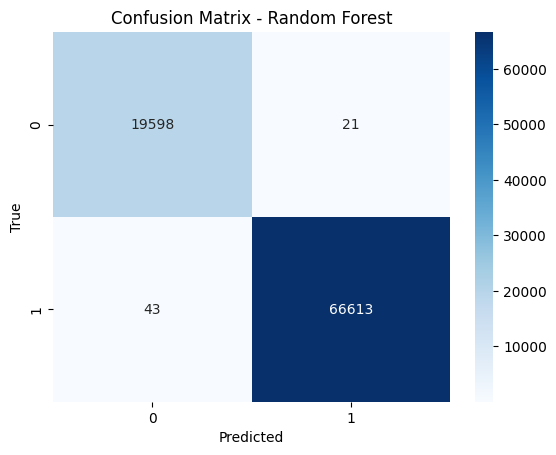

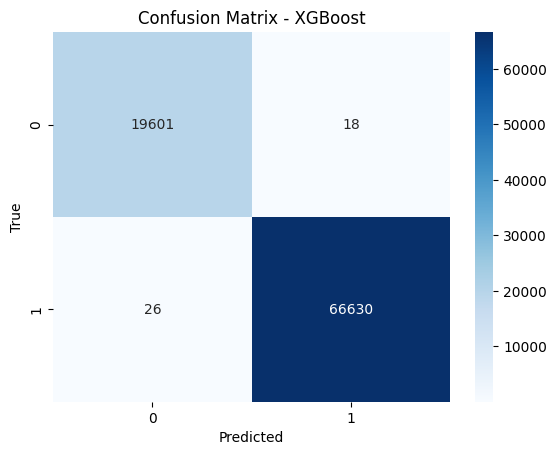

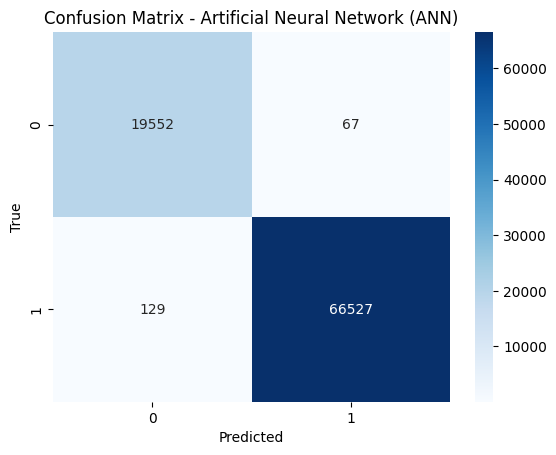

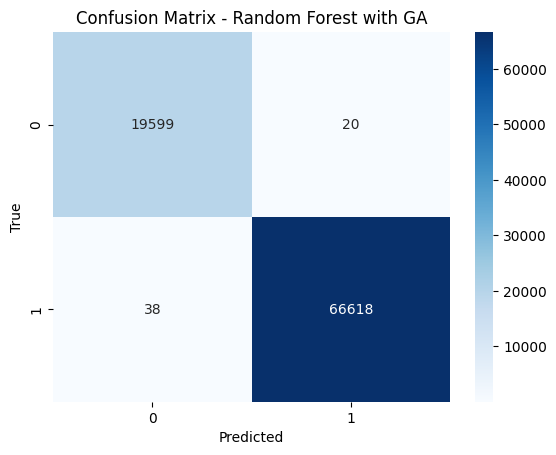

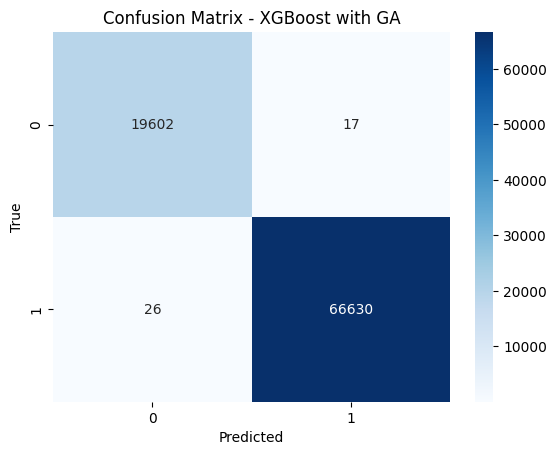

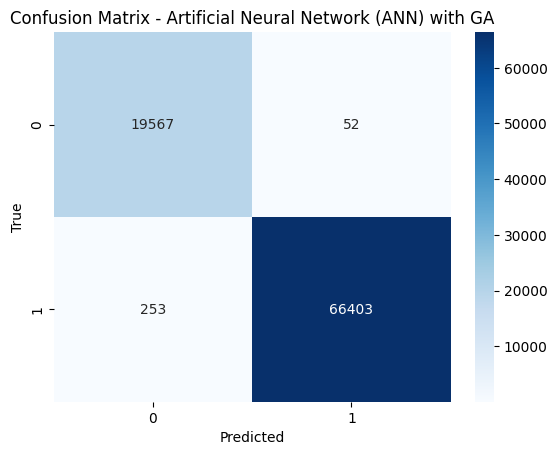

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plotting confusion matrix for Random Forest without Genetic Algorithm
cm_rf = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Plotting confusion matrix for XGBoost without Genetic Algorithm
cm_xg = confusion_matrix(y_test, y_pred_xg)
sns.heatmap(cm_xg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Plotting confusion matrix for ANN without Genetic Algorithm
cm_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Artificial Neural Network (ANN)')
plt.show()

# Plotting confusion matrix for Random Forest with Genetic Algorithm
selected_cm_rf = confusion_matrix(y_test, selected_y_pred)
sns.heatmap(selected_cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest with GA')
plt.show()

# Plotting confusion matrix for XGBoost with Genetic Algorithm
selected_cm_xg = confusion_matrix(y_test, selected_y_pred_xg)
sns.heatmap(selected_cm_xg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGBoost with GA')
plt.show()

# Plotting confusion matrix for ANN with Genetic Algorithm
selected_cm_ann = confusion_matrix(y_test, selected_y_pred_ann)
sns.heatmap(selected_cm_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Artificial Neural Network (ANN) with GA')
plt.show()

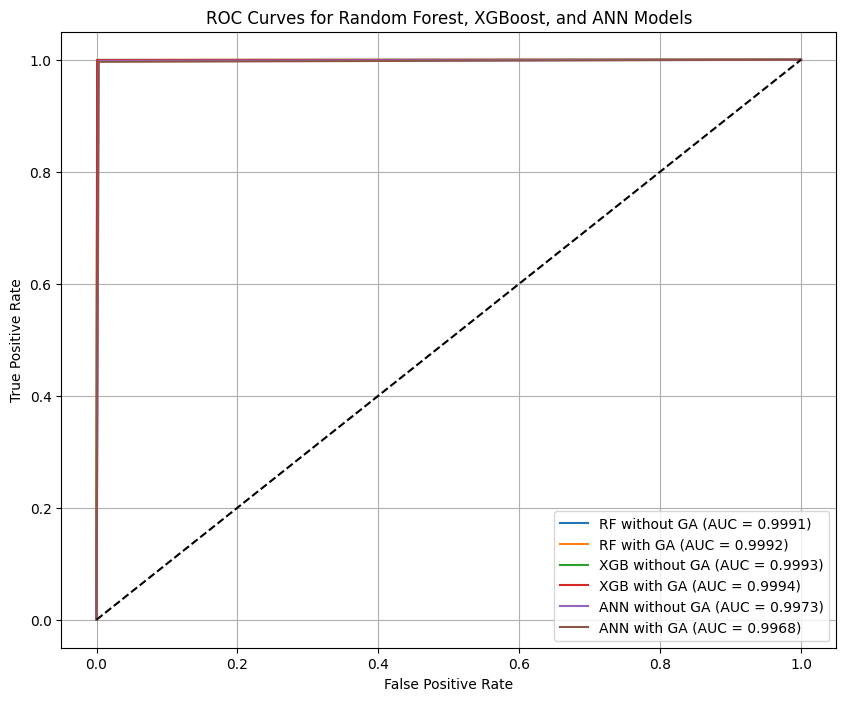

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for Random Forest model without Genetic Algorithm
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_pred)

# Calculate ROC curve and AUC for Random Forest model with Genetic Algorithm
fpr_rf_ga, tpr_rf_ga, _ = roc_curve(y_test, selected_y_pred)
auc_rf_ga = roc_auc_score(y_test, selected_y_pred)

# Calculate ROC curve and AUC for XGBoost model without Genetic Algorithm
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xg)
auc_xgb = roc_auc_score(y_test, y_pred_xg)

# Calculate ROC curve and AUC for XGBoost model with Genetic Algorithm
fpr_xgb_ga, tpr_xgb_ga, _ = roc_curve(y_test, selected_y_pred_xg)
auc_xgb_ga = roc_auc_score(y_test, selected_y_pred_xg)

# Calculate ROC curve and AUC for ANN model without Genetic Algorithm
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_ann)
auc_ann = roc_auc_score(y_test, y_pred_ann)

# Calculate ROC curve and AUC for ANN model with Genetic Algorithm
fpr_ann_ga, tpr_ann_ga, _ = roc_curve(y_test, selected_y_pred_ann)
auc_ann_ga = roc_auc_score(y_test, selected_y_pred_ann)

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'RF without GA (AUC = {auc_rf:.4f})')
plt.plot(fpr_rf_ga, tpr_rf_ga, label=f'RF with GA (AUC = {auc_rf_ga:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB without GA (AUC = {auc_xgb:.4f})')
plt.plot(fpr_xgb_ga, tpr_xgb_ga, label=f'XGB with GA (AUC = {auc_xgb_ga:.4f})')
plt.plot(fpr_ann, tpr_ann, label=f'ANN without GA (AUC = {auc_ann:.4f})')
plt.plot(fpr_ann_ga, tpr_ann_ga, label=f'ANN with GA (AUC = {auc_ann_ga:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest, XGBoost, and ANN Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

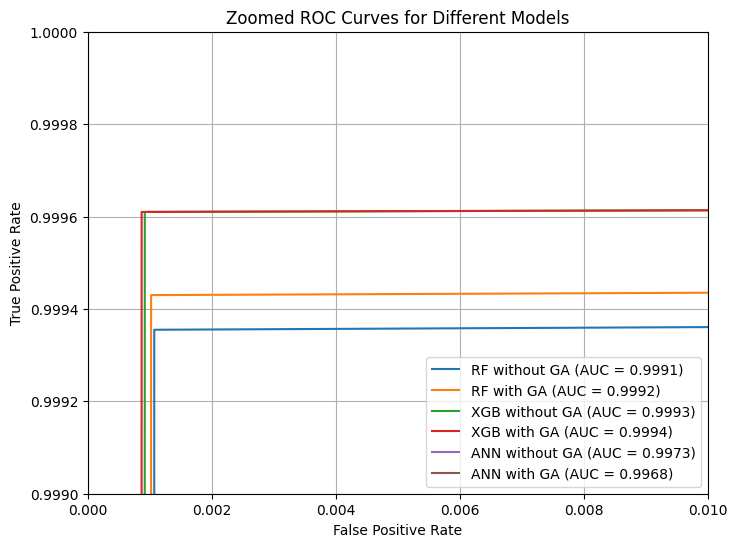

In [ ]:
# Plot ROC curves
plt.figure(figsize=(8, 6))

plt.plot(fpr_rf, tpr_rf, label=f'RF without GA (AUC = {auc_rf:.4f})')
plt.plot(fpr_rf_ga, tpr_rf_ga, label=f'RF with GA (AUC = {auc_rf_ga:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB without GA (AUC = {auc_xgb:.4f})')
plt.plot(fpr_xgb_ga, tpr_xgb_ga, label=f'XGB with GA (AUC = {auc_xgb_ga:.4f})')
plt.plot(fpr_ann, tpr_ann, label=f'ANN without GA (AUC = {auc_ann:.4f})')
plt.plot(fpr_ann_ga, tpr_ann_ga, label=f'ANN with GA (AUC = {auc_ann_ga:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Zoomed ROC Curves for Different Models')
plt.legend(loc='lower right')

# Set the limits of the axes
plt.xlim(0, 0.01)
plt.ylim(0.999, 1)

plt.grid(True)
plt.show()

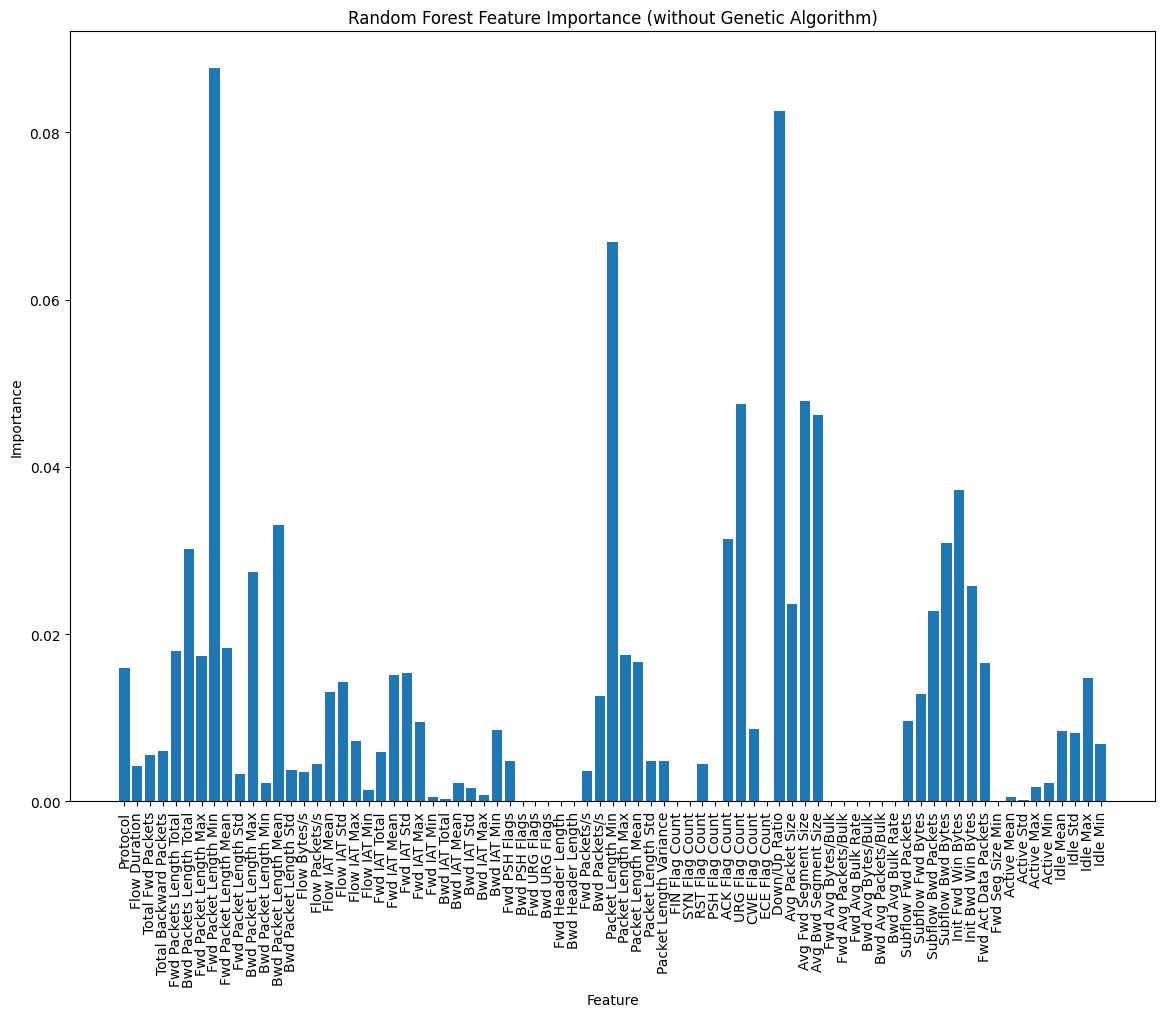

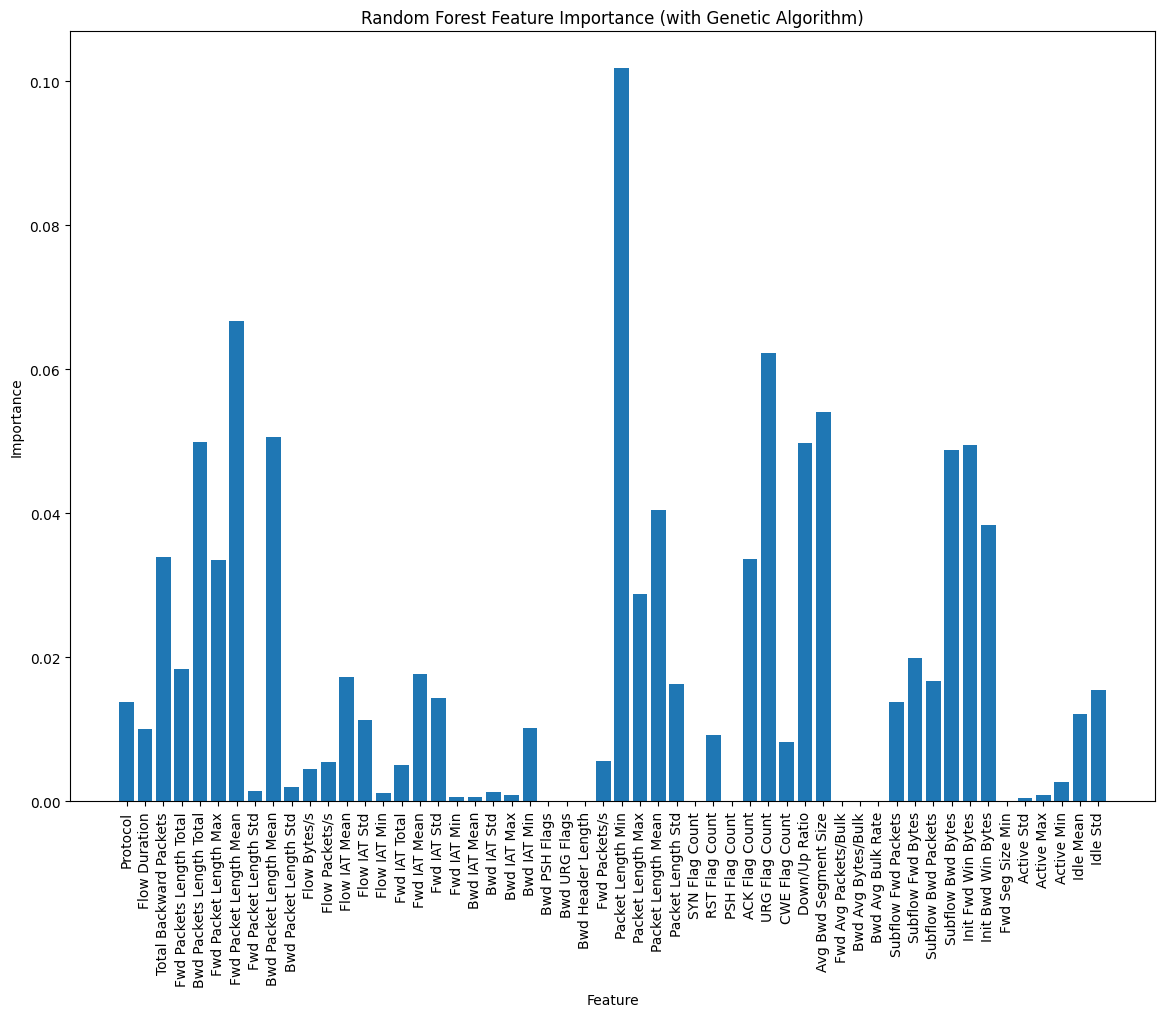

In [ ]:
# Plot feature importances for Random Forest without Genetic Algorithm
plt.figure(figsize=(14, 10))
plt.bar(range(len(rf_classifier.feature_importances_)), rf_classifier.feature_importances_)
plt.xticks(range(len(rf_classifier.feature_importances_)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance (without Genetic Algorithm)')
plt.show()

# Plot feature importances for Random Forest with Genetic Algorithm
plt.figure(figsize=(14, 10))
plt.bar(range(len(selected_rf_classifier.feature_importances_)), selected_rf_classifier.feature_importances_)
plt.xticks(range(len(selected_rf_classifier.feature_importances_)), selected_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance (with Genetic Algorithm)')
plt.show()


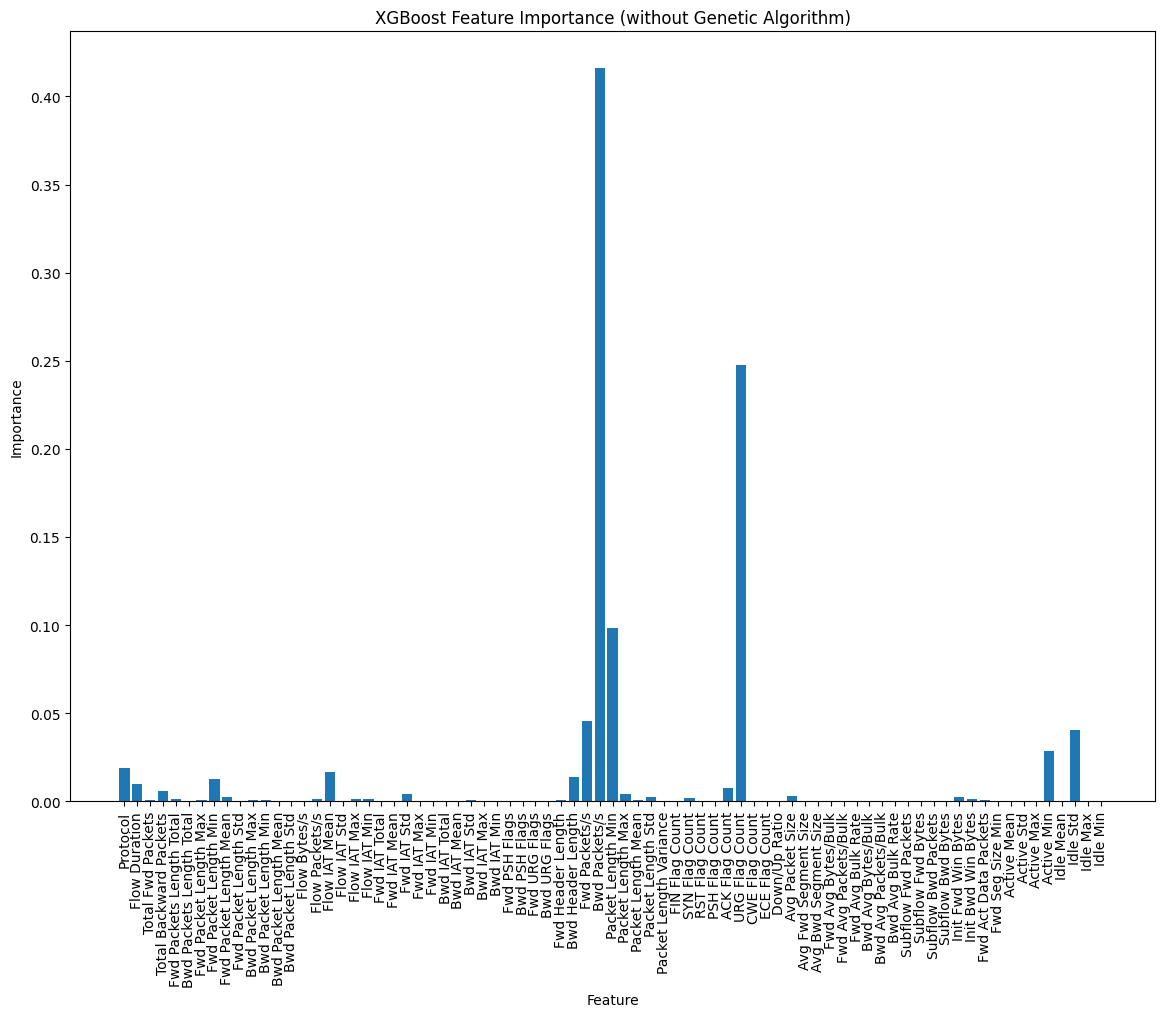

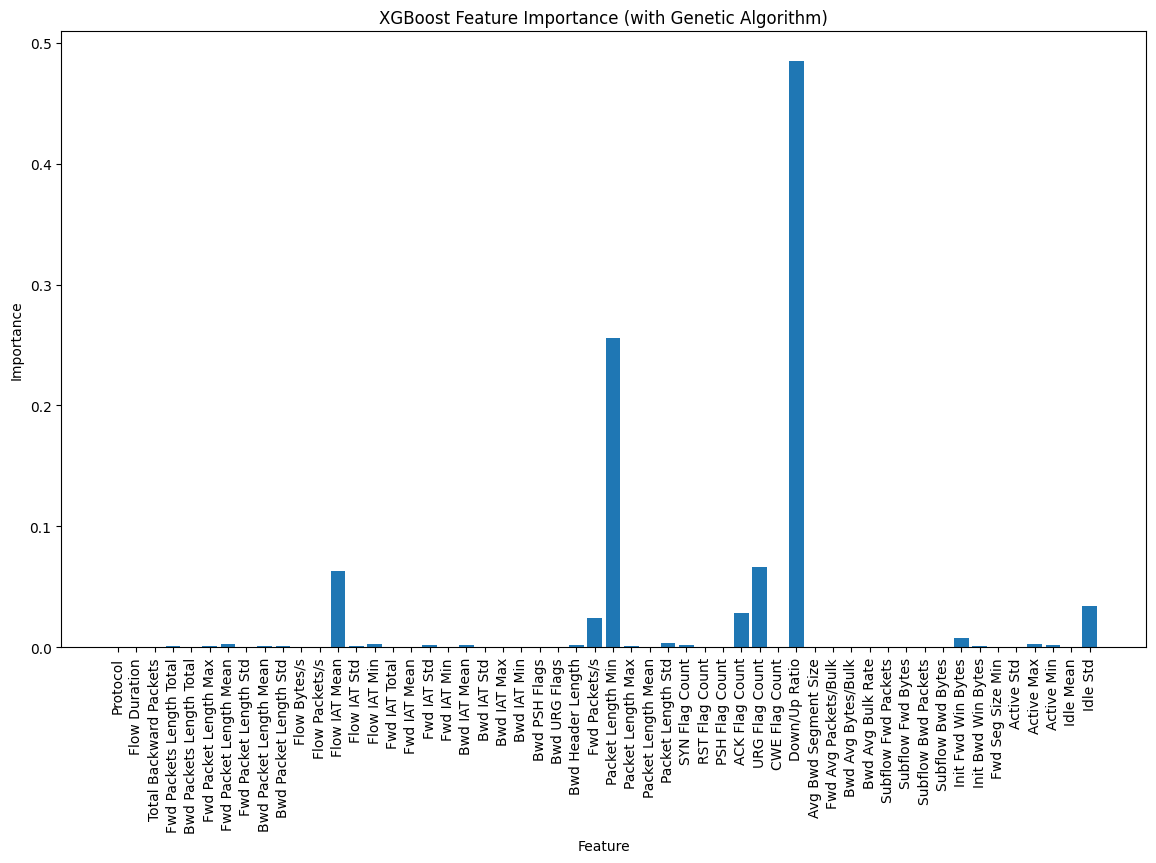

In [ ]:
# Plot feature importances for XGBoost without Genetic Algorithm
plt.figure(figsize=(14, 10))
plt.bar(range(len(xg_classifier.feature_importances_)), xg_classifier.feature_importances_)
plt.xticks(range(len(xg_classifier.feature_importances_)), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance (without Genetic Algorithm)')
plt.show()

# Plot feature importances for XGBoost with Genetic Algorithm
plt.figure(figsize=(14, 8))
plt.bar(range(len(selected_xg_classifier.feature_importances_)), selected_xg_classifier.feature_importances_)
plt.xticks(range(len(selected_xg_classifier.feature_importances_)), selected_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance (with Genetic Algorithm)')
plt.show()


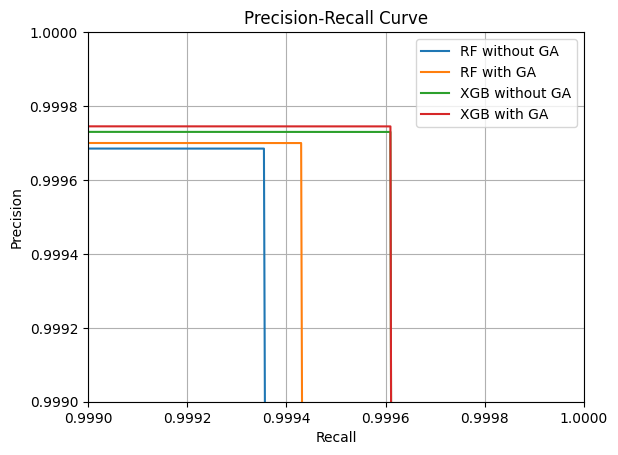

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate Precision-Recall curve and AUC for Random Forest model without Genetic Algorithm
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred)
plt.plot(recall_rf, precision_rf, label='RF without GA')

# Calculate Precision-Recall curve and AUC for Random Forest model with Genetic Algorithm
precision_rf_ga, recall_rf_ga, _ = precision_recall_curve(y_test, selected_y_pred)
plt.plot(recall_rf_ga, precision_rf_ga, label='RF with GA')

# Calculate Precision-Recall curve and AUC for XGBoost model without Genetic Algorithm
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_xg)
plt.plot(recall_xgb, precision_xgb, label='XGB without GA')

# Calculate Precision-Recall curve and AUC for XGBoost model with Genetic Algorithm
precision_xgb_ga, recall_xgb_ga, _ = precision_recall_curve(y_test, selected_y_pred_xg)
plt.plot(recall_xgb_ga, precision_xgb_ga, label='XGB with GA')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)

# Set the limits of the axes
plt.xlim(0.999, 1.0)
plt.ylim(0.999, 1.0)

plt.show()


In [ ]:
from joblib import dump

# Save Random Forest model without Genetic Algorithm
dump(rf_classifier, 'rf_classifier.joblib')
print("Random Forest model without Genetic Algorithm has been saved as 'rf_classifier.joblib'.")

# Save Random Forest model with Genetic Algorithm
dump(selected_rf_classifier, 'selected_rf_classifier.joblib')
print("Random Forest model with Genetic Algorithm has been saved as 'selected_rf_classifier.joblib'.")

# Save XGBoost model without Genetic Algorithm
dump(xg_classifier, 'xg_classifier.joblib')
print("XGBoost model without Genetic Algorithm has been saved as 'xg_classifier.joblib'.")

# Save XGBoost model with Genetic Algorithm
dump(selected_xg_classifier, 'selected_xg_classifier.joblib')
print("XGBoost model with Genetic Algorithm has been saved as 'selected_xg_classifier.joblib'.")

# Save ANN model without Genetic Algorithm
dump(ann_classifier, 'ann_classifier.joblib')
print("Artificial Neural Network model without Genetic Algorithm has been saved as 'ann_classifier.joblib'.")

# Save ANN model with Genetic Algorithm
dump(selected_ann_classifier, 'selected_ann_classifier.joblib')
print("Artificial Neural Network model with Genetic Algorithm has been saved as 'selected_ann_classifier.joblib'.")


Random Forest model without Genetic Algorithm has been saved as 'rf_classifier.joblib'.
Random Forest model with Genetic Algorithm has been saved as 'selected_rf_classifier.joblib'.
XGBoost model without Genetic Algorithm has been saved as 'xg_classifier.joblib'.
XGBoost model with Genetic Algorithm has been saved as 'selected_xg_classifier.joblib'.
Artificial Neural Network model without Genetic Algorithm has been saved as 'ann_classifier.joblib'.
Artificial Neural Network model with Genetic Algorithm has been saved as 'selected_ann_classifier.joblib'.


In [ ]:
# Save selected features
dump(selected_features, 'selected_features.joblib')
print("Selected features have been saved as 'selected_features.joblib'.")

Selected features have been saved as 'selected_features.joblib'.


In [ ]:
#Loading the saved models
import joblib
rf_classifier = joblib.load('rf_classifier.joblib')
selected_rf_classifier = joblib.load('selected_rf_classifier.joblib')
xg_classifier = joblib.load('xg_classifier.joblib')
selected_xg_classifier = joblib.load('selected_xg_classifier.joblib')

In [ ]:
X_test_selected = X_test[selected_features]

In [ ]:
y_pred = rf_classifier.predict(X_test)
y_pred_xg = xg_classifier.predict(X_test)
selected_y_pred = selected_rf_classifier.predict(X_test_selected)
selected_y_pred_xg = selected_xg_classifier.predict(X_test_selected)

In [ ]:
# Calculate RF accuracy on the testing data

print("Random Forest without GA")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

Random Forest without GA
Accuracy: 0.999258186033034
Classification Report:
              precision    recall  f1-score   support

           0     0.9978    0.9989    0.9984     19619
           1     0.9997    0.9994    0.9995     66656

    accuracy                         0.9993     86275
   macro avg     0.9987    0.9991    0.9989     86275
weighted avg     0.9993    0.9993    0.9993     86275



In [ ]:
# Calculate RF accuracy with GA on the testing data

print("Random Forest with GA")
selected_accuracy = accuracy_score(y_test, selected_y_pred)
print("Accuracy:", selected_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, selected_y_pred, digits=4))

Random Forest with GA
Accuracy: 0.999327731092437
Classification Report:
              precision    recall  f1-score   support

           0     0.9981    0.9990    0.9985     19619
           1     0.9997    0.9994    0.9996     66656

    accuracy                         0.9993     86275
   macro avg     0.9989    0.9992    0.9990     86275
weighted avg     0.9993    0.9993    0.9993     86275



In [ ]:
# Calculate XG accuracy on the testing data

print("XGboost without GA")
xg_accuracy = accuracy_score(y_test, y_pred_xg)
print("Accuracy:", xg_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xg, digits=4))

XGboost without GA
Accuracy: 0.9994900028977108
Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9991    0.9989     19619
           1     0.9997    0.9996    0.9997     66656

    accuracy                         0.9995     86275
   macro avg     0.9992    0.9993    0.9993     86275
weighted avg     0.9995    0.9995    0.9995     86275



In [ ]:
# Calculate XG accuracy with GA on the testing data

print("XGboost with GA")
selected_xg_accuracy = accuracy_score(y_test, selected_y_pred_xg)
print("Accuracy:", selected_xg_accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, selected_y_pred_xg, digits=4))

XGboost with GA
Accuracy: 0.9995015937409446
Classification Report:
              precision    recall  f1-score   support

           0     0.9987    0.9991    0.9989     19619
           1     0.9997    0.9996    0.9997     66656

    accuracy                         0.9995     86275
   macro avg     0.9992    0.9994    0.9993     86275
weighted avg     0.9995    0.9995    0.9995     86275



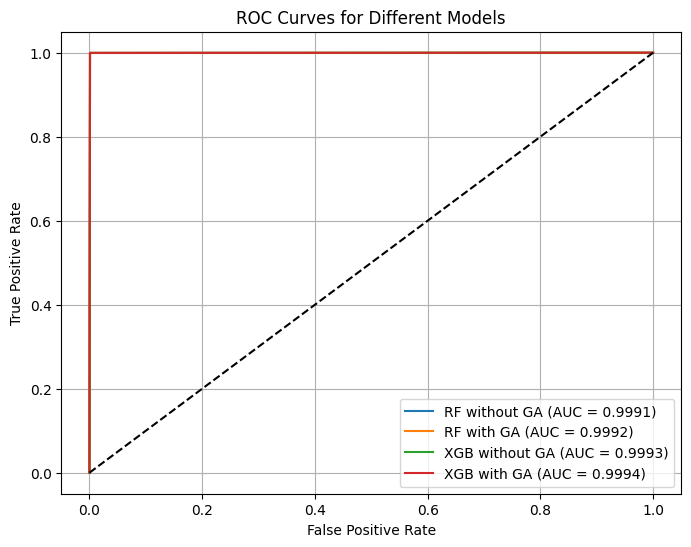

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for Random Forest model without Genetic Algorithm
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
auc_rf = roc_auc_score(y_test, y_pred)

# Calculate ROC curve and AUC for Random Forest model with Genetic Algorithm
fpr_rf_ga, tpr_rf_ga, _ = roc_curve(y_test, selected_y_pred)
auc_rf_ga = roc_auc_score(y_test, selected_y_pred)

# Calculate ROC curve and AUC for XGBoost model without Genetic Algorithm
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xg)
auc_xgb = roc_auc_score(y_test, y_pred_xg)

# Calculate ROC curve and AUC for XGBoost model with Genetic Algorithm
fpr_xgb_ga, tpr_xgb_ga, _ = roc_curve(y_test, selected_y_pred_xg)
auc_xgb_ga = roc_auc_score(y_test, selected_y_pred_xg)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RF without GA (AUC = {auc_rf:.4f})')
plt.plot(fpr_rf_ga, tpr_rf_ga, label=f'RF with GA (AUC = {auc_rf_ga:.4f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGB without GA (AUC = {auc_xgb:.4f})')
plt.plot(fpr_xgb_ga, tpr_xgb_ga, label=f'XGB with GA (AUC = {auc_xgb_ga:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


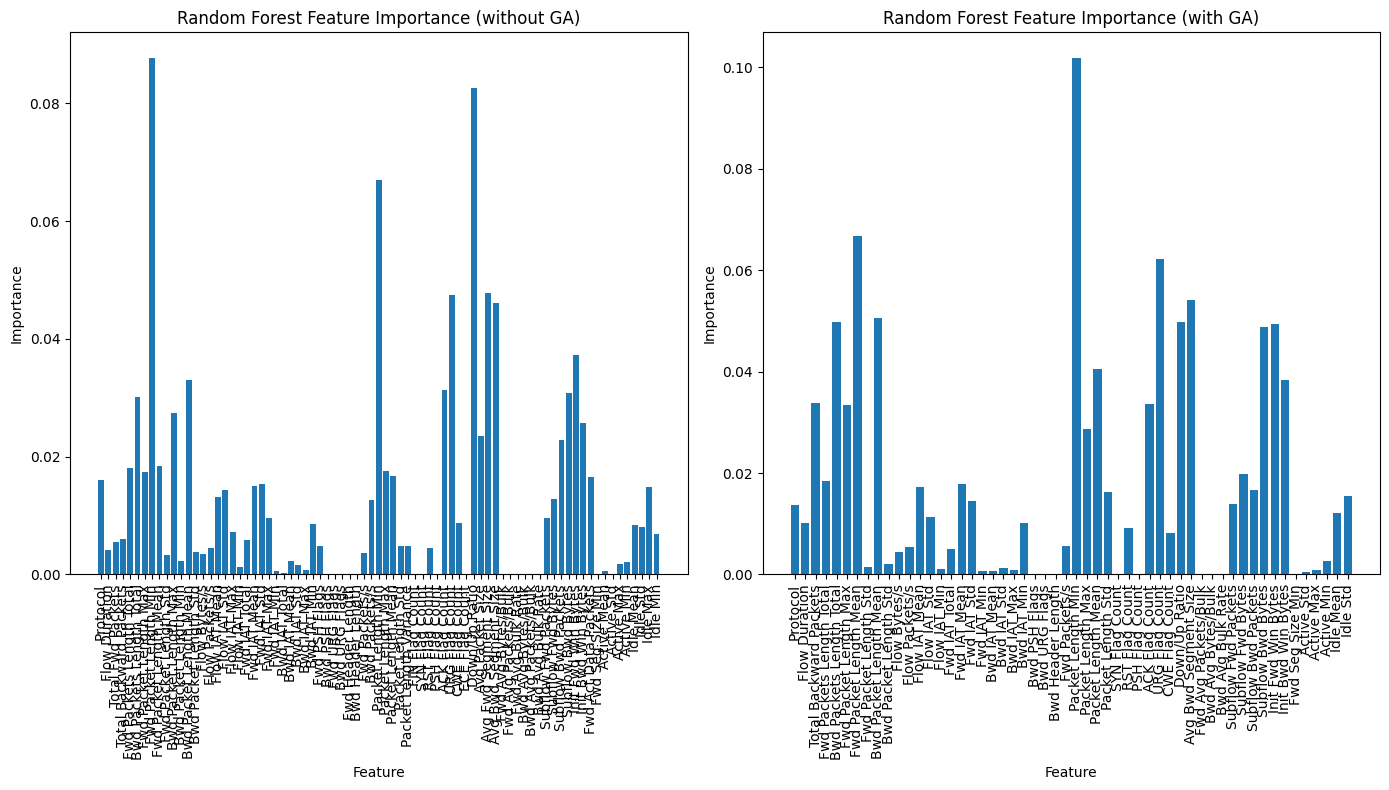

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

# Plot feature importances for Random Forest without Genetic Algorithm
axes[0].bar(range(len(rf_classifier.feature_importances_)), rf_classifier.feature_importances_)
axes[0].set_xticks(range(len(rf_classifier.feature_importances_)))
axes[0].set_xticklabels(X.columns, rotation=90)
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Importance')
axes[0].set_title('Random Forest Feature Importance (without GA)')

# Plot feature importances for Random Forest with Genetic Algorithm
axes[1].bar(range(len(selected_rf_classifier.feature_importances_)), selected_rf_classifier.feature_importances_)
axes[1].set_xticks(range(len(selected_rf_classifier.feature_importances_)))
axes[1].set_xticklabels(selected_features, rotation=90)
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Importance')
axes[1].set_title('Random Forest Feature Importance (with GA)')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the combined plot
plt.show()


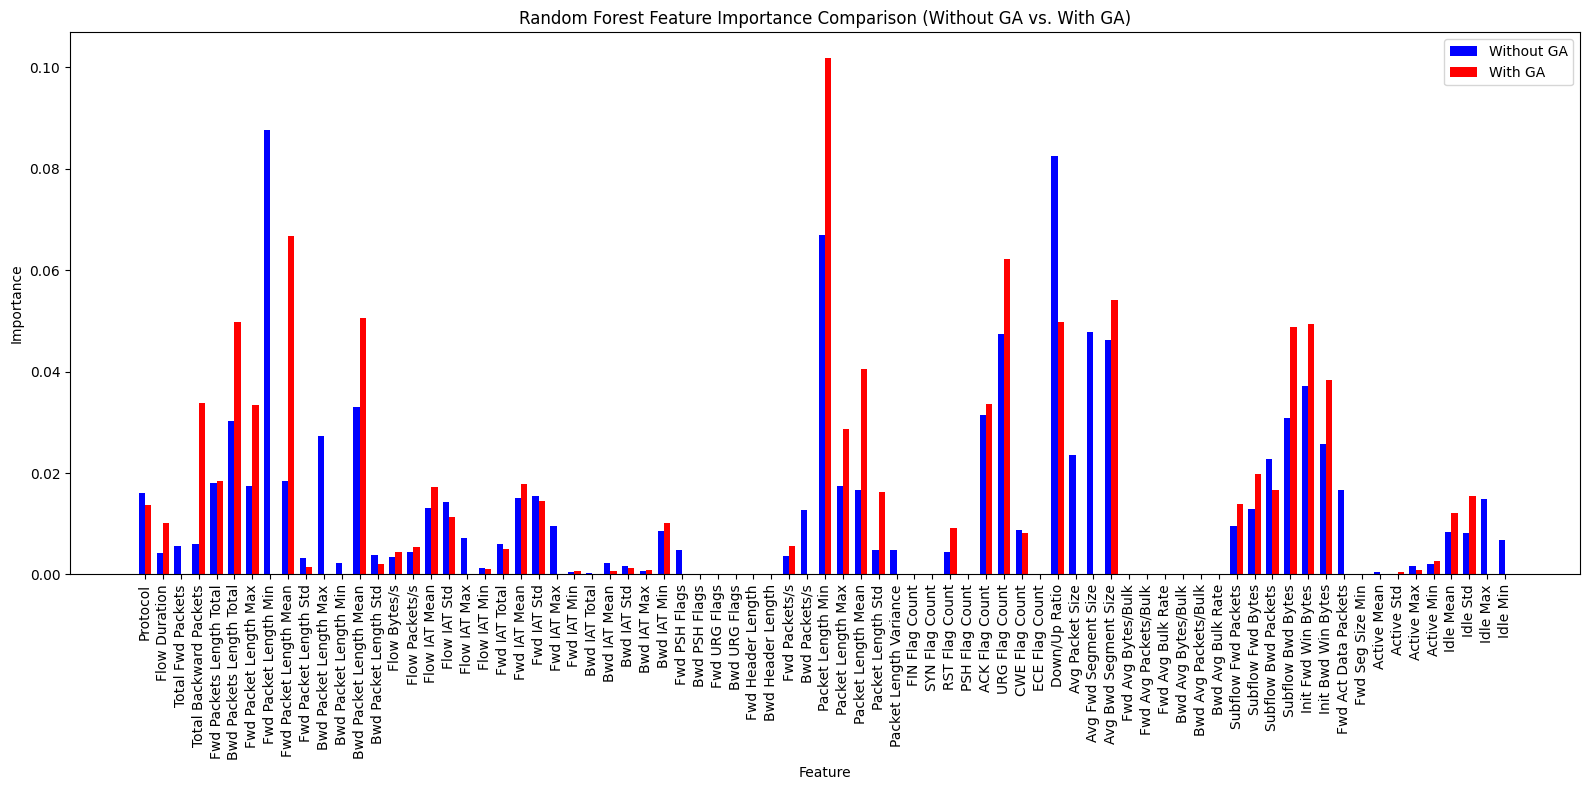

In [ ]:
# Total feature set (all 77)
total_features = list(X.columns)  # or your full set of features
# Selected feature set after GA (34)
selected_features = list(selected_features)  # Loaded from the .joblib file or your selected set

# Find the common features between the total set and the selected set
common_features = list(set(total_features) & set(selected_features))

# Get the indices of the common features in the total feature set
total_indices = [total_features.index(feature) for feature in common_features]
# Get the indices of the common features in the selected feature set
selected_indices = [selected_features.index(feature) for feature in common_features]

# All features (the 77 features)
total_features = list(X.columns)

# Selected features (the 34 features from Genetic Algorithm)
selected_features_set = set(selected_features)  # Convert to set for faster lookup

# Create aligned feature importance arrays with zero for non-existent features
rf_importances_aligned = np.zeros(len(total_features))
selected_rf_importances_aligned = np.zeros(len(total_features))

# Set feature importances for the full set
for i, feature in enumerate(total_features):
    rf_importances_aligned[i] = rf_classifier.feature_importances_[i]

# Set feature importances for the selected set (where it matches the total feature list)
for feature in selected_features_set:
    if feature in total_features:
        idx = total_features.index(feature)  # Find the correct index
        # Assuming feature importances are in the same order as the features
        selected_rf_importances_aligned[idx] = selected_rf_classifier.feature_importances_[selected_features.index(feature)]

# Create the plot with aligned feature importances
num_features = len(total_features)
indices = np.arange(num_features)
bar_width = 0.35  # Width of the bars

plt.figure(figsize=(16, 8))

# Plot feature importances for the full model (77 features)
plt.bar(indices, rf_importances_aligned, bar_width, label='Without GA', color='b')

# Plot feature importances for the selected model (34 features)
plt.bar(indices + bar_width, selected_rf_importances_aligned, bar_width, label='With GA', color='r')

# Set x-ticks to match the full feature list
plt.xticks(indices + bar_width / 2, total_features, rotation=90)

# Labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance Comparison (Without GA vs. With GA)')
plt.legend()

# Ensure clean layout and show the plot
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


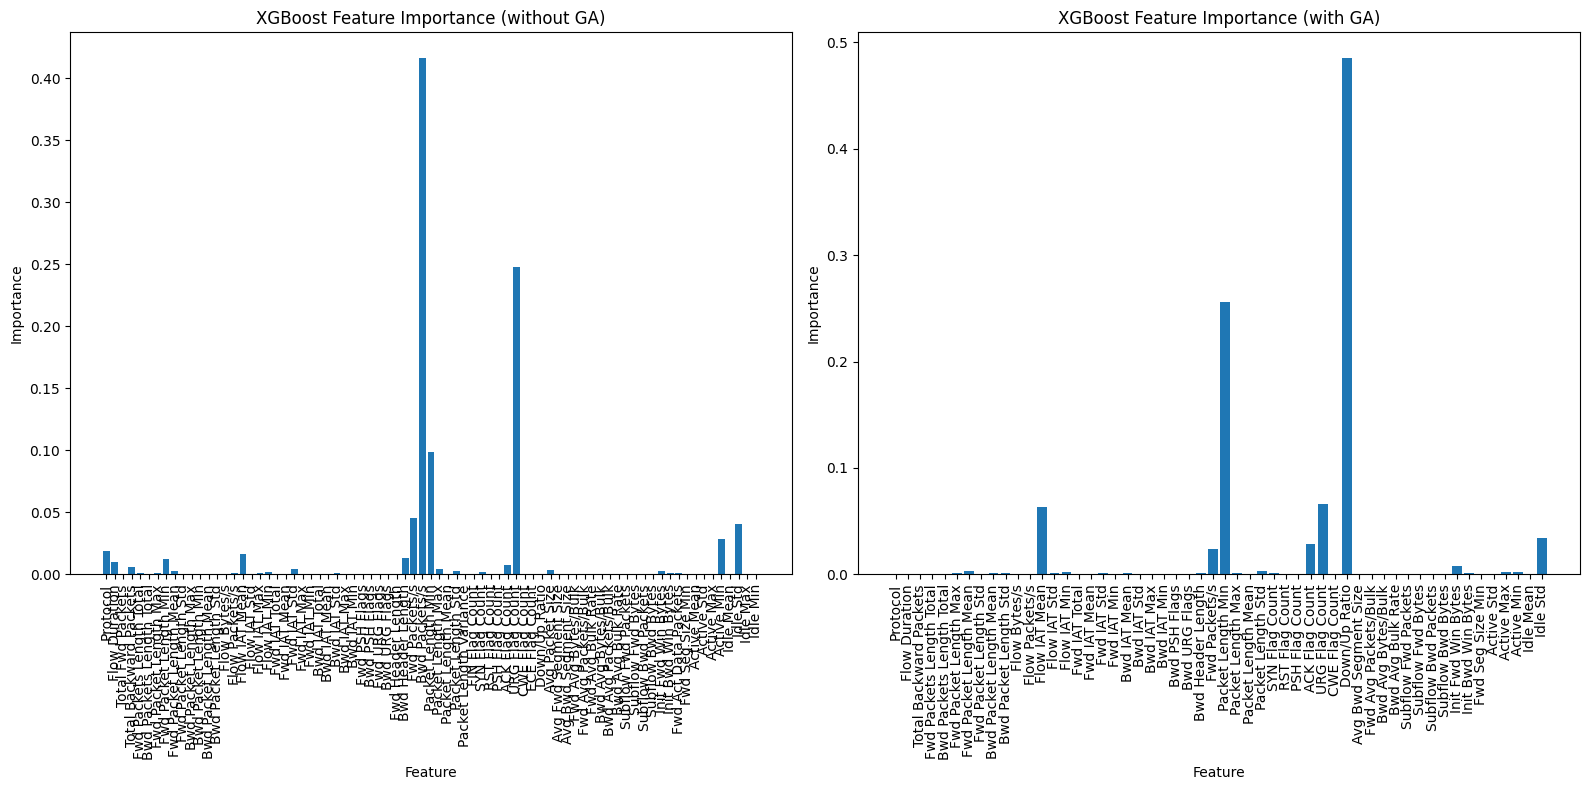

In [ ]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot feature importances for XGBoost without Genetic Algorithm
axes[0].bar(range(len(xg_classifier.feature_importances_)), xg_classifier.feature_importances_)
axes[0].set_xticks(range(len(xg_classifier.feature_importances_)))
axes[0].set_xticklabels(X.columns, rotation=90)
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Importance')
axes[0].set_title('XGBoost Feature Importance (without GA)')

# Plot feature importances for XGBoost with Genetic Algorithm
axes[1].bar(range(len(selected_xg_classifier.feature_importances_)), selected_xg_classifier.feature_importances_)
axes[1].set_xticks(range(len(selected_xg_classifier.feature_importances_)))
axes[1].set_xticklabels(selected_features, rotation=90)
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Importance')
axes[1].set_title('XGBoost Feature Importance (with GA)')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the combined plot
plt.show()

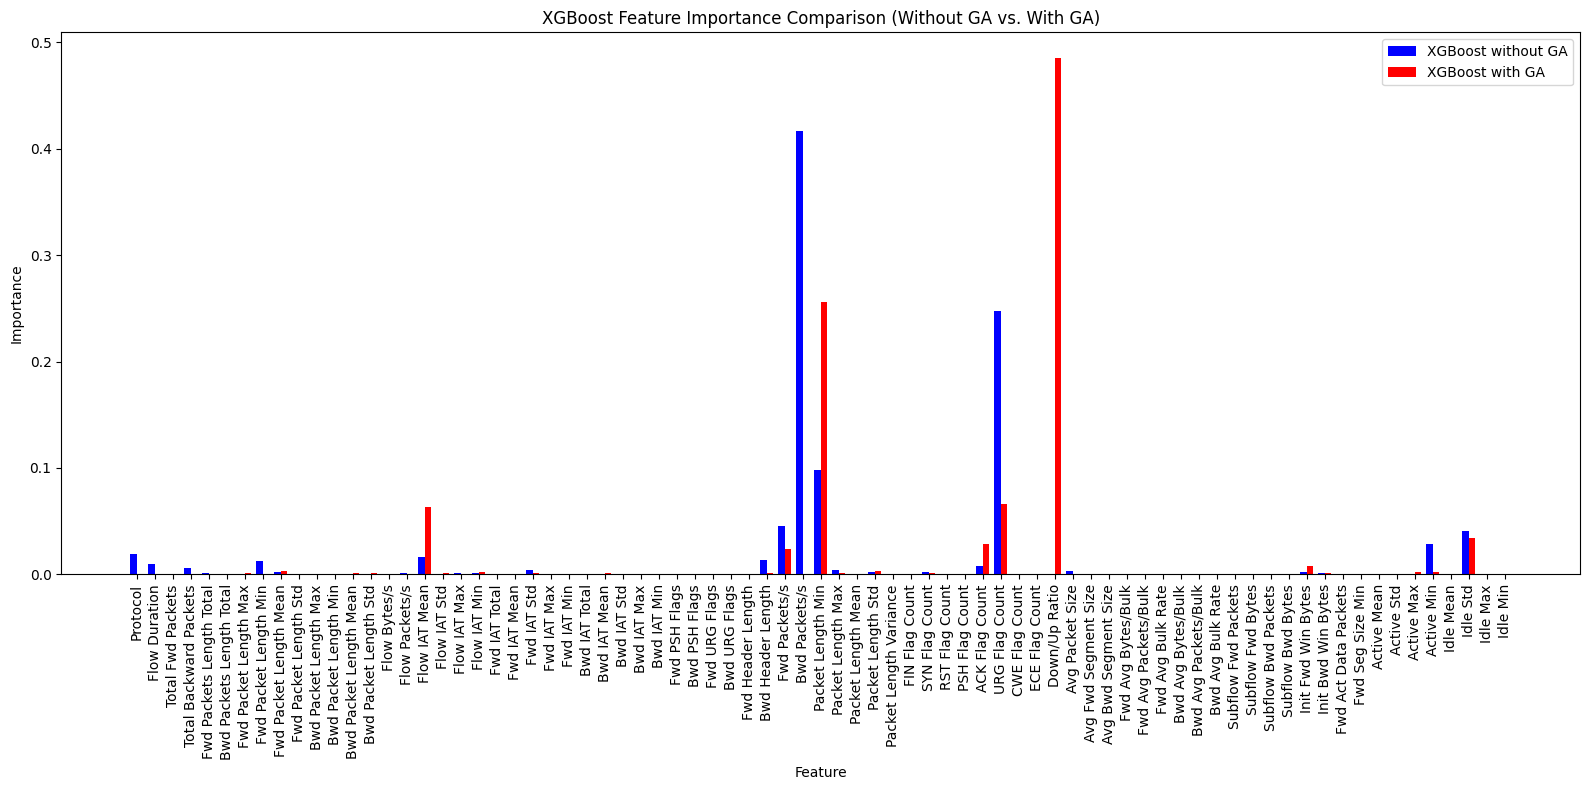

In [ ]:
# All features (the 77 features)
total_features = list(X.columns)

# Selected features (the 34 features from Genetic Algorithm)
selected_features_set = set(selected_features)

# Create aligned feature importance arrays with zeros for non-existent features
xg_importances_aligned = np.zeros(len(total_features))
selected_xg_importances_aligned = np.zeros(len(total_features))

# Set feature importances for the full XGBoost model
for i, feature in enumerate(total_features):
    xg_importances_aligned[i] = xg_classifier.feature_importances_[i]

# Set feature importances for the selected XGBoost model (where it matches the total feature list)
for feature in selected_features_set:
    if feature in total_features:
        idx = total_features.index(feature)  # Find the correct index
        selected_xg_importances_aligned[idx] = selected_xg_classifier.feature_importances_[selected_features.index(feature)]

# Create the plot with aligned feature importances for both XGBoost models
num_features = len(total_features)
indices = np.arange(num_features)
bar_width = 0.35  # Width of the bars

plt.figure(figsize=(16, 8))

# Plot feature importances for the full XGBoost model (77 features)
plt.bar(indices, xg_importances_aligned, bar_width, label='XGBoost without GA', color='b')

# Plot feature importances for the XGBoost model with GA (34 features)
plt.bar(indices + bar_width, selected_xg_importances_aligned, bar_width, label='XGBoost with GA', color='r')

# Set x-ticks to align with the total feature list
plt.xticks(indices + bar_width / 2, total_features, rotation=90)

# Labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGBoost Feature Importance Comparison (Without GA vs. With GA)')
plt.legend()

# Ensure a clean layout and show the plot
plt.tight_layout()  # Adjust to prevent overlapping labels
plt.show()


In [ ]:
# Displaying all original features of the dataset
total_features

['Protocol',
 'Flow Duration',
 'Total Fwd Packets',
 'Total Backward Packets',
 'Fwd Packets Length Total',
 'Bwd Packets Length Total',
 'Fwd Packet Length Max',
 'Fwd Packet Length Min',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Min',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Flow Bytes/s',
 'Flow Packets/s',
 'Flow IAT Mean',
 'Flow IAT Std',
 'Flow IAT Max',
 'Flow IAT Min',
 'Fwd IAT Total',
 'Fwd IAT Mean',
 'Fwd IAT Std',
 'Fwd IAT Max',
 'Fwd IAT Min',
 'Bwd IAT Total',
 'Bwd IAT Mean',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Min',
 'Fwd PSH Flags',
 'Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'Fwd Header Length',
 'Bwd Header Length',
 'Fwd Packets/s',
 'Bwd Packets/s',
 'Packet Length Min',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'FIN Flag Count',
 'SYN Flag Count',
 'RST Flag Count',
 'PSH Flag Count',
 'ACK Flag Count',
 'URG Flag Count',

# Extracting Important Features based on the feature importance

In [ ]:
# Set a threshold to determine what "important" means.
# You can set it to a specific percentage or top N features based on importance.
importance_threshold = 0.005  # Features with importance >= 0.5%

# Get the feature importances from Random Forest without GA
rf_importances = rf_classifier.feature_importances_
# Extract the most important features
rf_important_features = [X.columns[i] for i in range(len(rf_importances)) if rf_importances[i] >= importance_threshold]

# Get the feature importances from Random Forest with GA
rf_ga_importances = selected_rf_classifier.feature_importances_
# Extract the most important features from RF with GA
rf_ga_important_features = [selected_features[i] for i in range(len(rf_ga_importances)) if rf_ga_importances[i] >= importance_threshold]

# Get the feature importances from XGBoost without GA
xg_importances = xg_classifier.feature_importances_
# Extract the most important features from XGBoost without GA
xg_important_features = [X.columns[i] for i in range(len(xg_importances)) if xg_importances[i] >= importance_threshold]

# Get the feature importances from XGBoost with GA
xg_ga_importances = selected_xg_classifier.feature_importances_
# Extract the most important features from XGBoost with GA
xg_ga_important_features = [selected_features[i] for i in range(len(xg_ga_importances)) if xg_ga_importances[i] >= importance_threshold]

# Display the extracted important features
print("Important features from Random Forest (without GA):", rf_important_features)
print("Important features from Random Forest (with GA):", rf_ga_important_features)
print("Important features from XGBoost (without GA):", xg_important_features)
print("Important features from XGBoost (with GA):", xg_ga_important_features)

Important features from Random Forest (without GA): ['Protocol', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length Total', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Bwd Packet Length Max', 'Bwd Packet Length Mean', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Min', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes', 'Fwd Act Data Packets', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']
Important features from Random Forest (with GA): ['Protocol', 'Flow Duration', 'Total Backward Packets', 'Fwd Packets Length Total', 'Bwd Packets Length T

# Printing the resulting test data with the important features

In [ ]:
# Printing the resulting test data with the important features from Random Forest (without GA)
X_test_rf_important = X_test[rf_important_features]

# Printing the resulting test data with the important features from Random Forest (with GA)
X_test_rf_important_ga = X_test[rf_ga_important_features]

# Printing the resulting test data with the important features from XGBoost (without GA)
X_test_xg_important = X_test[xg_important_features]

# Printing the resulting test data with the important features from XGBoost (with GA)
X_test_xg_important_ga = X_test[xg_ga_important_features]

In [ ]:
print("Shape of test data with important features from Random Forest (without GA):", X_test_rf_important.shape)
print("Shape of test data with important features from Random Forest (with GA):", X_test_rf_important_ga.shape)
print("Shape of test data with important features from XGBoost (without GA):", X_test_xg_important.shape)
print("Shape of test data with important features from XGBoost (with GA):", X_test_xg_important_ga.shape)

Shape of test data with important features from Random Forest (without GA): (86275, 40)
Shape of test data with important features from Random Forest (with GA): (86275, 34)
Shape of test data with important features from XGBoost (without GA): (86275, 13)
Shape of test data with important features from XGBoost (with GA): (86275, 8)


# Making the resulting test data the same size as the size of the original test data without GA (77) and with GA (34) to avoid errors.
## This is done by making the unimportant features zero (i.e those features in the original test data that are not in the resulting test data)

In [ ]:
# Step 1: Create a DataFrame of zeros with the same columns as X_test
X_test_result_rf = pd.DataFrame(0, index=X_test.index, columns=X_test.columns)
X_test_result_rf_ga = pd.DataFrame(0, index=X_test_selected.index, columns=X_test_selected.columns)
X_test_result_xg = pd.DataFrame(0, index=X_test.index, columns=X_test.columns)
X_test_result_xg_ga = pd.DataFrame(0, index=X_test_selected.index, columns=X_test_selected.columns)

In [ ]:
# Step 2: Fill in known features
# This updates the template with the actual values from the reduced set
X_test_result_rf[X_test_rf_important.columns] = X_test_rf_important
X_test_result_rf_ga[X_test_rf_important_ga.columns] = X_test_rf_important_ga
X_test_result_xg[X_test_xg_important.columns] = X_test_xg_important
X_test_result_xg_ga[X_test_xg_important_ga.columns] = X_test_xg_important_ga

In [ ]:
# Step 3: Check the result
X_test_result_rf.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
396344,1.000000,0,0.001119,0.000000,0.002806,0.000000e+00,0.013699,0.138902,0.144948,0,...,0.005169,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
24038,0.352941,0,0.000081,0.000189,0.000003,6.161271e-07,0.000187,0.002816,0.001990,0,...,0.000373,0,0,0,0,0,0.065829,0.023397,0.075489,0.056168
170124,1.000000,0,0.000035,0.000000,0.000135,0.000000e+00,0.016065,0.242140,0.171128,0,...,0.000160,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
178369,1.000000,0,0.000035,0.000000,0.000135,0.000000e+00,0.016065,0.242140,0.171128,0,...,0.000160,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
8940,1.000000,0,0.000058,0.000000,0.000137,0.000000e+00,0.012235,0.150634,0.115412,0,...,0.000266,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000


In [ ]:
X_test_result_rf_ga.head()

,Protocol,Flow Duration,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Mean,Bwd Packet Length Std,...,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Seg Size Min,Active Std,Active Max,Active Min,Idle Mean,Idle Std
396344,1.000000,0.000004,0.000000,0.002806,0.000000e+00,0.013699,0.144948,0,0.000000,0,...,0.000000,0.000000e+00,0.000000,0.000000,0,0,0,0,0.000000,0.000000
24038,0.352941,0.139135,0.000189,0.000003,6.161271e-07,0.000187,0.001990,0,0.001197,0,...,0.000189,6.161271e-07,0.089127,0.000015,0,0,0,0,0.065829,0.023397
170124,1.000000,0.025071,0.000000,0.000135,0.000000e+00,0.016065,0.171128,0,0.000000,0,...,0.000000,0.000000e+00,0.000000,0.000000,0,0,0,0,0.000000,0.000000
178369,1.000000,0.025936,0.000000,0.000135,0.000000e+00,0.016065,0.171128,0,0.000000,0,...,0.000000,0.000000e+00,0.000000,0.000000,0,0,0,0,0.000000,0.000000
8940,1.000000,0.001793,0.000000,0.000137,0.000000e+00,0.012235,0.115412,0,0.000000,0,...,0.000000,0.000000e+00,0.000000,0.000000,0,0,0,0,0.000000,0.000000


# Making prediction using the resulting test data

In [ ]:
# Prediction
y_pred_important_rf = rf_classifier.predict(X_test_result_rf)
y_pred_important_rf_ga = selected_rf_classifier.predict(X_test_result_rf_ga)
y_pred_important_xg = rf_classifier.predict(X_test_result_xg)
y_pred_important_xg_ga = selected_rf_classifier.predict(X_test_result_xg_ga)

In [ ]:
print("Random Forest Important without GA")

# Calculate accuracy on the testing data
accuracy_important_rf = accuracy_score(y_test, y_pred_important_rf)
print("Accuracy:", accuracy_important_rf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_important_rf, digits=4))

Random Forest Important without GA
Accuracy: 0.9986206896551724
Classification Report:
              precision    recall  f1-score   support

           0     0.9958    0.9981    0.9970     19619
           1     0.9994    0.9988    0.9991     66656

    accuracy                         0.9986     86275
   macro avg     0.9976    0.9984    0.9980     86275
weighted avg     0.9986    0.9986    0.9986     86275



In [ ]:
print("Random Forest Important with GA")

# Calculate accuracy on the testing data
accuracy_important_rf_ga = accuracy_score(y_test, y_pred_important_rf_ga)
print("Accuracy:", accuracy_important_rf_ga)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_important_rf_ga, digits=4))

Random Forest Important with GA
Accuracy: 0.9988988698927846
Classification Report:
              precision    recall  f1-score   support

           0     0.9967    0.9984    0.9976     19619
           1     0.9995    0.9990    0.9993     66656

    accuracy                         0.9989     86275
   macro avg     0.9981    0.9987    0.9984     86275
weighted avg     0.9989    0.9989    0.9989     86275



In [ ]:
print("XGboost Important without GA")

# Calculate accuracy on the testing data
accuracy_important_xg = accuracy_score(y_test, y_pred_important_xg)
print("Accuracy:", accuracy_important_xg)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_important_xg, digits=4))

XGboost Important without GA
Accuracy: 0.900005795421617
Classification Report:
              precision    recall  f1-score   support

           0     0.9883    0.5670    0.7206     19619
           1     0.8868    0.9980    0.9391     66656

    accuracy                         0.9000     86275
   macro avg     0.9375    0.7825    0.8298     86275
weighted avg     0.9098    0.9000    0.8894     86275



In [ ]:
print("XGboost Important with GA")

# Calculate accuracy on the testing data
accuracy_important_xg_ga = accuracy_score(y_test, y_pred_important_xg_ga)
print("Accuracy:", accuracy_important_xg_ga)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_important_xg_ga, digits=4))

XGboost Important with GA
Accuracy: 0.35666183714865257
Classification Report:
              precision    recall  f1-score   support

           0     0.2612    1.0000    0.4142     19619
           1     1.0000    0.1673    0.2867     66656

    accuracy                         0.3567     86275
   macro avg     0.6306    0.5837    0.3504     86275
weighted avg     0.8320    0.3567    0.3156     86275



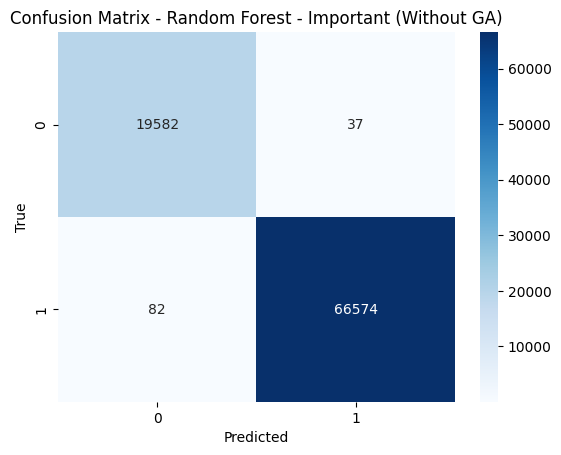

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Plotting confusion matrix for Random Forest without Genetic Algorithm
cm_rf_important = confusion_matrix(y_test, y_pred_important_rf)
sns.heatmap(cm_rf_important, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest - Important (Without GA)')
plt.show()

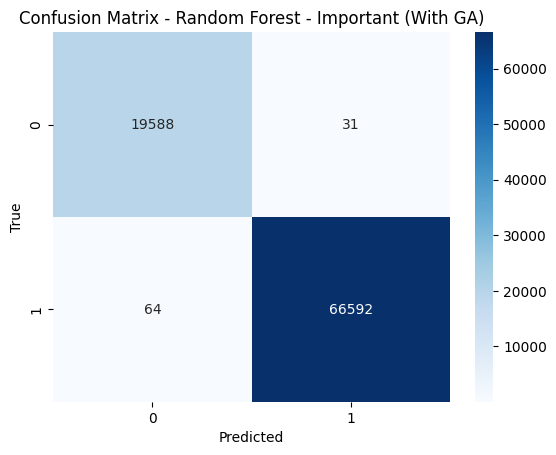

In [ ]:
# Plotting confusion matrix for Random Forest with Genetic Algorithm
cm_rf_important = confusion_matrix(y_test, y_pred_important_rf_ga)
sns.heatmap(cm_rf_important, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest - Important (With GA)')
plt.show()

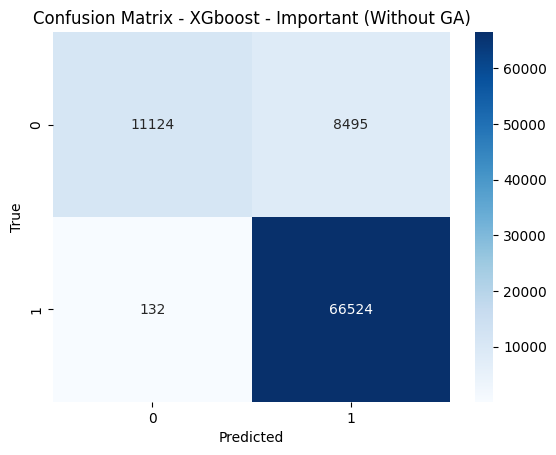

In [ ]:
# Plotting confusion matrix for Random Forest with Genetic Algorithm
cm_rf_important = confusion_matrix(y_test, y_pred_important_xg)
sns.heatmap(cm_rf_important, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGboost - Important (Without GA)')
plt.show()

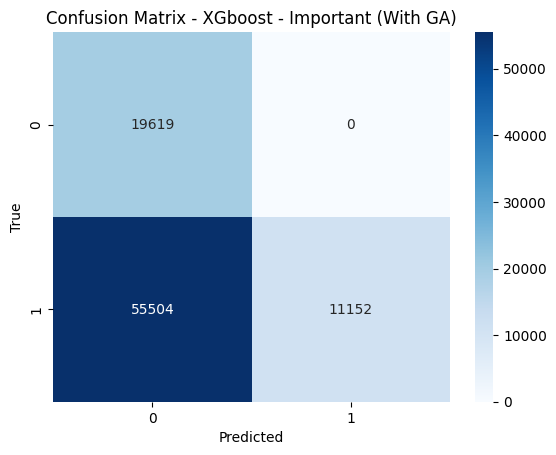

In [ ]:
# Plotting confusion matrix for Random Forest with Genetic Algorithm
cm_rf_important = confusion_matrix(y_test, y_pred_important_xg_ga)
sns.heatmap(cm_rf_important, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGboost - Important (With GA)')
plt.show()

# Tweaking the important features to see its effect on the performance (Perturbation)
## Adding the half of the maximum and minimum range to each values of the data

In [ ]:
# Function to add perturbation to the dataset
def add_perturbation(dataset):
    perturbed_dataset = dataset.copy()
    for col_name in dataset.columns:
        col_range = dataset[col_name].max() - dataset[col_name].min()
        perturbation = col_range / 2
        perturbed_dataset[col_name] += perturbation
    return perturbed_dataset

# Perform perturbation on each dataset
X_test_result_rf_perturbed = add_perturbation(X_test_result_rf)
X_test_result_rf_ga_perturbed = add_perturbation(X_test_result_rf_ga)
X_test_result_xg_perturbed = add_perturbation(X_test_result_xg)
X_test_result_xg_ga_perturbed = add_perturbation(X_test_result_xg_ga)

In [ ]:
X_test_result_rf_perturbed.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
396344,1.500000,0.0,0.024900,0.105773,0.348134,0.102665,0.400062,0.548569,0.569008,0.0,...,0.114675,0.0,0.0,0.0,0.0,0.0,0.409457,0.500000,0.438263,0.409457
24038,0.852941,0.0,0.023862,0.105962,0.345332,0.102665,0.386550,0.412482,0.426050,0.0,...,0.109880,0.0,0.0,0.0,0.0,0.0,0.475286,0.523397,0.513752,0.465625
170124,1.500000,0.0,0.023816,0.105773,0.345464,0.102665,0.402428,0.651807,0.595188,0.0,...,0.109666,0.0,0.0,0.0,0.0,0.0,0.409457,0.500000,0.438263,0.409457
178369,1.500000,0.0,0.023816,0.105773,0.345464,0.102665,0.402428,0.651807,0.595188,0.0,...,0.109666,0.0,0.0,0.0,0.0,0.0,0.409457,0.500000,0.438263,0.409457
8940,1.500000,0.0,0.023839,0.105773,0.345465,0.102665,0.398599,0.560300,0.539472,0.0,...,0.109773,0.0,0.0,0.0,0.0,0.0,0.409457,0.500000,0.438263,0.409457


In [ ]:
X_test_result_rf_ga_perturbed.head()

,Protocol,Flow Duration,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Mean,Bwd Packet Length Std,...,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Seg Size Min,Active Std,Active Max,Active Min,Idle Mean,Idle Std
396344,1.500000,0.500001,0.105773,0.348134,0.102665,0.400062,0.569008,0.0,0.500000,0.0,...,0.105773,0.102665,0.500000,0.500000,0.0,0.0,0.0,0.0,0.409457,0.500000
24038,0.852941,0.639132,0.105962,0.345332,0.102665,0.386550,0.426050,0.0,0.501197,0.0,...,0.105962,0.102665,0.589127,0.500015,0.0,0.0,0.0,0.0,0.475286,0.523397
170124,1.500000,0.525068,0.105773,0.345464,0.102665,0.402428,0.595188,0.0,0.500000,0.0,...,0.105773,0.102665,0.500000,0.500000,0.0,0.0,0.0,0.0,0.409457,0.500000
178369,1.500000,0.525933,0.105773,0.345464,0.102665,0.402428,0.595188,0.0,0.500000,0.0,...,0.105773,0.102665,0.500000,0.500000,0.0,0.0,0.0,0.0,0.409457,0.500000
8940,1.500000,0.501790,0.105773,0.345465,0.102665,0.398599,0.539472,0.0,0.500000,0.0,...,0.105773,0.102665,0.500000,0.500000,0.0,0.0,0.0,0.0,0.409457,0.500000


In [ ]:
# Prediction
y_pred_perturbed_rf = rf_classifier.predict(X_test_result_rf_perturbed)
y_pred_perturbed_rf_ga = selected_rf_classifier.predict(X_test_result_rf_ga_perturbed)
y_pred_perturbed_xg = rf_classifier.predict(X_test_result_xg_perturbed)
y_pred_perturbed_xg_ga = selected_rf_classifier.predict(X_test_result_xg_ga_perturbed)

In [ ]:
print("Perturbed Random Forest without GA")

# Calculate accuracy on the testing data
accuracy_perturbed_rf = accuracy_score(y_test, y_pred_perturbed_rf)
print("Accuracy:", accuracy_perturbed_rf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_perturbed_rf, digits=4))

Perturbed Random Forest without GA
Accuracy: 0.2274007534048102
Classification Report:
              precision    recall  f1-score   support

           0     0.2274    1.0000    0.3705     19619
           1     0.0000    0.0000    0.0000     66656

    accuracy                         0.2274     86275
   macro avg     0.1137    0.5000    0.1853     86275
weighted avg     0.0517    0.2274    0.0843     86275



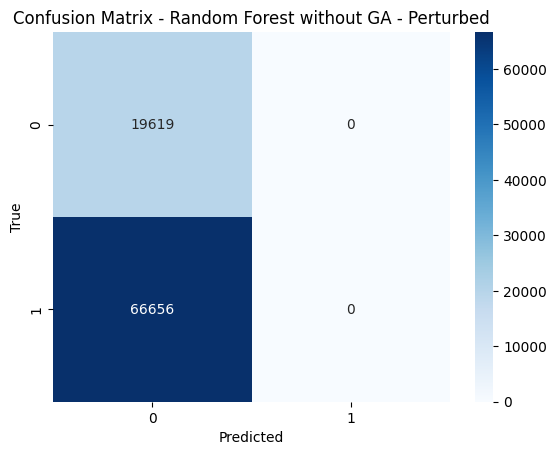

In [ ]:
# Plotting confusion matrix for Perturbed Random Forest without Genetic Algorithm
cm_rf_perturbed = confusion_matrix(y_test, y_pred_perturbed_rf)
sns.heatmap(cm_rf_perturbed, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest without GA - Perturbed')
plt.show()

In [ ]:
print("Perturbed Random Forest with GA")

# Calculate accuracy on the testing data
accuracy_perturbed_rf_ga = accuracy_score(y_test, y_pred_perturbed_rf_ga)
print("Accuracy:", accuracy_perturbed_rf_ga)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_perturbed_rf_ga, digits=4))

Perturbed Random Forest with GA
Accuracy: 0.2274007534048102
Classification Report:
              precision    recall  f1-score   support

           0     0.2274    1.0000    0.3705     19619
           1     0.0000    0.0000    0.0000     66656

    accuracy                         0.2274     86275
   macro avg     0.1137    0.5000    0.1853     86275
weighted avg     0.0517    0.2274    0.0843     86275



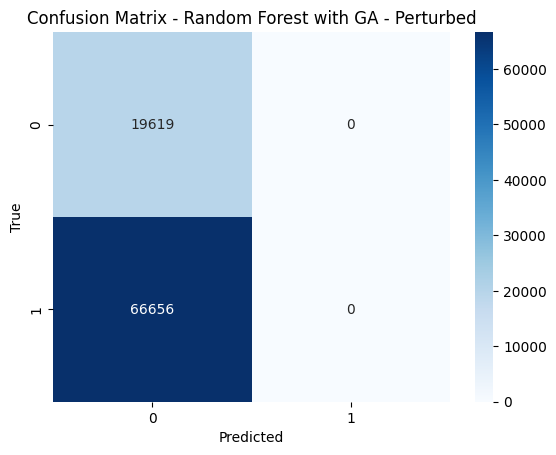

In [ ]:
# Plotting confusion matrix for Perturbed Random Forest with Genetic Algorithm
cm_rf_perturbed_ga = confusion_matrix(y_test, y_pred_perturbed_rf_ga)
sns.heatmap(cm_rf_perturbed_ga, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest with GA - Perturbed')
plt.show()

In [ ]:
print("Perturbed XGboost without GA")

# Calculate accuracy on the testing data
accuracy_perturbed_xg = accuracy_score(y_test, y_pred_perturbed_xg)
print("Accuracy:", accuracy_perturbed_xg)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_perturbed_xg, digits=4))

Perturbed XGboost without GA
Accuracy: 0.8695102868733701
Classification Report:
              precision    recall  f1-score   support

           0     0.9849    0.4328    0.6013     19619
           1     0.8567    0.9980    0.9220     66656

    accuracy                         0.8695     86275
   macro avg     0.9208    0.7154    0.7617     86275
weighted avg     0.8859    0.8695    0.8491     86275



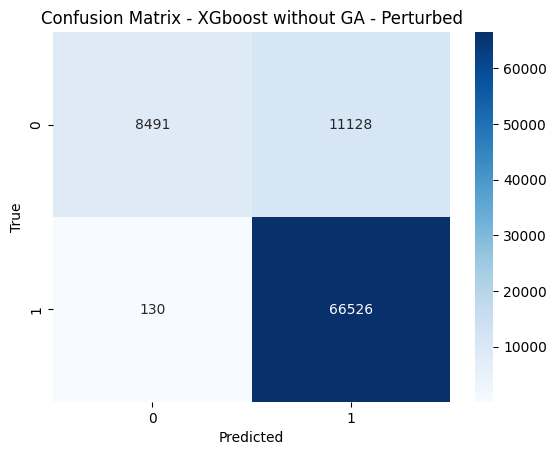

In [ ]:
# Plotting confusion matrix for Perturbed XGboost without Genetic Algorithm
cm_xg_perturbed = confusion_matrix(y_test, y_pred_perturbed_xg)
sns.heatmap(cm_xg_perturbed, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGboost without GA - Perturbed')
plt.show()

In [ ]:
print("Perturbed XGboost with GA")

# Calculate accuracy on the testing data
accuracy_perturbed_xg_ga = accuracy_score(y_test, y_pred_perturbed_xg_ga)
print("Accuracy:", accuracy_perturbed_xg_ga)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_perturbed_xg_ga, digits=4))

Perturbed XGboost with GA
Accuracy: 0.22084033613445378
Classification Report:
              precision    recall  f1-score   support

           0     0.2221    0.9697    0.3614     19619
           1     0.0450    0.0004    0.0008     66656

    accuracy                         0.2208     86275
   macro avg     0.1336    0.4851    0.1811     86275
weighted avg     0.0853    0.2208    0.0828     86275



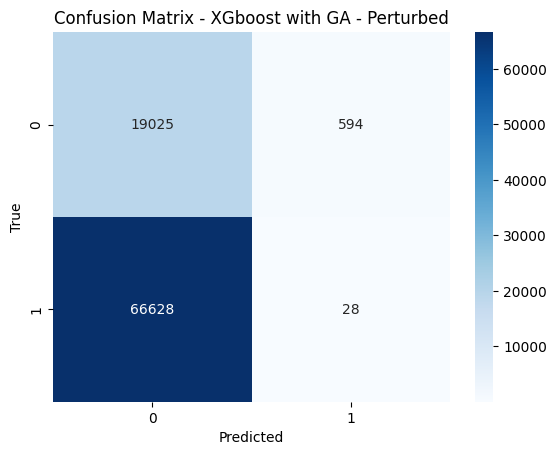

In [ ]:
# Plotting confusion matrix for Perturbed XGboost with Genetic Algorithm
cm_xg_perturbed_ga = confusion_matrix(y_test, y_pred_perturbed_xg_ga)
sns.heatmap(cm_xg_perturbed_ga, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - XGboost with GA - Perturbed')
plt.show()

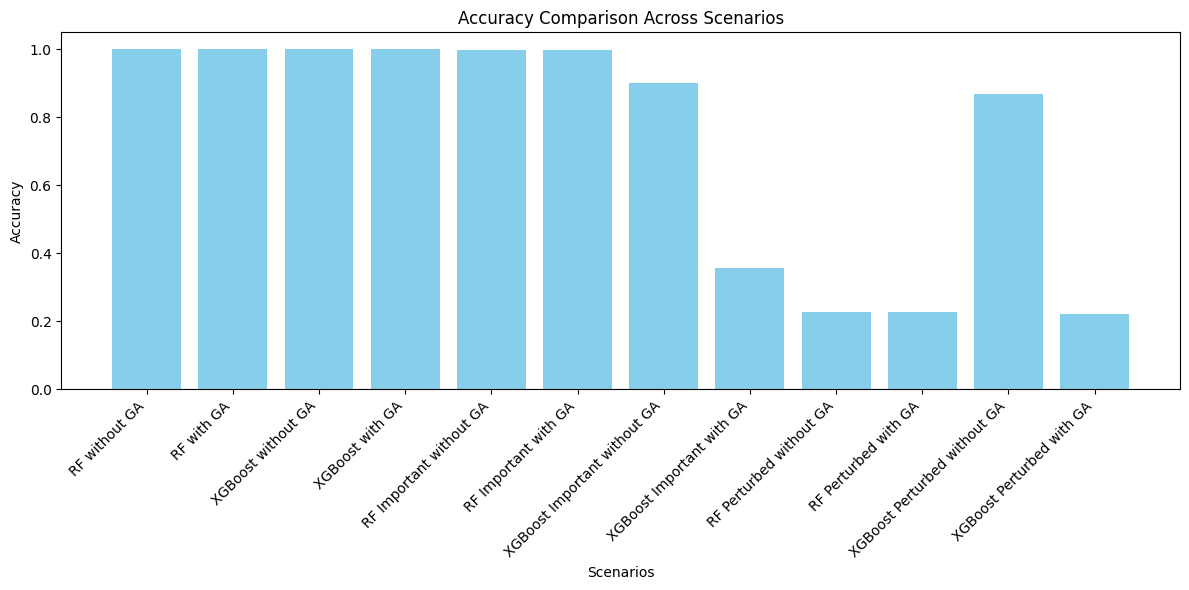

In [ ]:
# Define scenario labels
scenarios = [
    "RF without GA", "RF with GA",
    "XGBoost without GA", "XGBoost with GA",
    "RF Important without GA", "RF Important with GA",
    "XGBoost Important without GA", "XGBoost Important with GA",
    "RF Perturbed without GA", "RF Perturbed with GA",
    "XGBoost Perturbed without GA", "XGBoost Perturbed with GA"
]

# Define accuracy values for each scenario
accuracies = [
    accuracy, selected_accuracy,
    xg_accuracy, selected_xg_accuracy,
    accuracy_important_rf, accuracy_important_rf_ga,
    accuracy_important_xg, accuracy_important_xg_ga,
    accuracy_perturbed_rf, accuracy_perturbed_rf_ga,
    accuracy_perturbed_xg, accuracy_perturbed_xg_ga
]

# Plotting the bar plot
plt.figure(figsize=(12, 6))
plt.bar(scenarios, accuracies, color='skyblue')
plt.xlabel('Scenarios')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Scenarios')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
# Save each dataset as a CSV file
X_test_rf_important.to_csv('X_test_rf_important.csv', index=False)
X_test_rf_important_ga.to_csv('X_test_rf_important_ga.csv', index=False)
X_test_xg_important.to_csv('X_test_xg_important.csv', index=False)
X_test_xg_important_ga.to_csv('X_test_xg_important_ga.csv', index=False)

In [ ]:
X_test_rf_important

,Protocol,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Mean,...,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Idle Mean,Idle Std,Idle Max,Idle Min
396344,1.000000,0.001119,0.000000,0.002806,0.000000e+00,0.013699,0.138902,0.144948,0.000000,0.000000,...,0.002806,0.000000,0.000000e+00,0.000000,0.000000,0.005169,0.000000,0.000000,0.000000,0.000000
24038,0.352941,0.000081,0.000189,0.000003,6.161271e-07,0.000187,0.002816,0.001990,0.000158,0.001197,...,0.000003,0.000189,6.161271e-07,0.089127,0.000015,0.000373,0.065829,0.023397,0.075489,0.056168
170124,1.000000,0.000035,0.000000,0.000135,0.000000e+00,0.016065,0.242140,0.171128,0.000000,0.000000,...,0.000135,0.000000,0.000000e+00,0.000000,0.000000,0.000160,0.000000,0.000000,0.000000,0.000000
178369,1.000000,0.000035,0.000000,0.000135,0.000000e+00,0.016065,0.242140,0.171128,0.000000,0.000000,...,0.000135,0.000000,0.000000e+00,0.000000,0.000000,0.000160,0.000000,0.000000,0.000000,0.000000
8940,1.000000,0.000058,0.000000,0.000137,0.000000e+00,0.012235,0.150634,0.115412,0.000000,0.000000,...,0.000137,0.000000,0.000000e+00,0.000000,0.000000,0.000266,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241117,1.000000,0.000035,0.000000,0.000135,0.000000e+00,0.016065,0.242140,0.171128,0.000000,0.000000,...,0.000135,0.000000,0.000000e+00,0.000000,0.000000,0.000160,0.000000,0.000000,0.000000,0.000000
76087,0.352941,0.000173,0.000442,0.000110,1.126486e-04,0.016096,0.000000,0.034843,0.037671,0.093821,...,0.000110,0.000442,1.126486e-04,0.125015,0.003708,0.000746,0.000000,0.000000,0.000000,0.000000
51279,0.352941,0.000081,0.000189,0.000003,6.161271e-07,0.000187,0.002816,0.001990,0.000158,0.001197,...,0.000003,0.000189,6.161271e-07,0.089127,0.000015,0.000373,0.092267,0.056277,0.119981,0.055964
274317,1.000000,0.000035,0.000000,0.000094,0.000000e+00,0.012111,0.154857,0.119226,0.000000,0.000000,...,0.000094,0.000000,0.000000e+00,0.000000,0.000000,0.000160,0.000000,0.000000,0.000000,0.000000


In [ ]:
from google.colab import files

In [ ]:
#Download the file to the local system
files.download('X_test_rf_important.csv')
files.download('X_test_rf_important_ga.csv')
files.download('X_test_xg_important.csv')
files.download('X_test_xg_important_ga.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install adversarial-robustness-toolbox
import xgboost as xgb
import numpy as np


from art.attacks.evasion import ZooAttack
from art.estimators.classification import XGBoostClassifier
from art.utils import load_mnist

In [ ]:
selected_features = ['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes',
       'Fwd Act Data Packets', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min']


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/cicddos2019_dataset.csv')

In [ ]:
# Print the categorical columns in the dataset
cat_df = df.select_dtypes(include=['object'])
print(cat_df.columns)

Index(['Label', 'Class'], dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Min-max normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [ ]:
X_selected = X_normalized[selected_features]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)

In [ ]:
x_test = x_test[0:5]
y_test = y_test[0:5]
# Convert the Series to a NumPy array before reshaping
y_test = y_test.values.reshape(y_test.shape[0], -1)

In [ ]:
nb_samples_train = x_train.shape[0]
nb_samples_test = x_test.shape[0]
x_train = x_train.values.reshape((nb_samples_train, -1)) # Use .values to get the underlying NumPy array and reshape
x_test = x_test.values.reshape((nb_samples_test, -1))   # Use -1 to infer the correct number of columns

In [ ]:
# Step 2: Create the model
import xgboost as xgb
import numpy as np
import json

params = {"objective": "multi:softprob", "eval_metric": ["mlogloss", "merror"], "num_class": 10}

dtrain = xgb.DMatrix(x_train, label=np.array(y_train.values)) # Access the underlying NumPy array of the Series using .values
dtest = xgb.DMatrix(x_test, label=np.array(y_test)) # Change axis to 0 to match the new shape of y_test
dtrain = xgb.DMatrix(x_train, label=np.array(y_train))
evals = [(dtest, "test"), (dtrain, "train")]
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=16, evals=evals)

[0]	test-mlogloss:0.99643	test-merror:0.00000	train-mlogloss:1.00477	train-merror:0.00409
[1]	test-mlogloss:0.67719	test-merror:0.00000	train-mlogloss:0.68386	train-merror:0.00407
[2]	test-mlogloss:0.47920	test-merror:0.00000	train-mlogloss:0.48571	train-merror:0.00345
[3]	test-mlogloss:0.34550	test-merror:0.00000	train-mlogloss:0.35162	train-merror:0.00196
[4]	test-mlogloss:0.25157	test-merror:0.00000	train-mlogloss:0.25736	train-merror:0.00148
[5]	test-mlogloss:0.18427	test-merror:0.00000	train-mlogloss:0.18976	train-merror:0.00135
[6]	test-mlogloss:0.13551	test-merror:0.00000	train-mlogloss:0.14077	train-merror:0.00147
[7]	test-mlogloss:0.09993	test-merror:0.00000	train-mlogloss:0.10499	train-merror:0.00144
[8]	test-mlogloss:0.07384	test-merror:0.00000	train-mlogloss:0.07858	train-merror:0.00109
[9]	test-mlogloss:0.05452	test-merror:0.00000	train-mlogloss:0.05899	train-merror:0.00100
[10]	test-mlogloss:0.04029	test-merror:0.00000	train-mlogloss:0.04439	train-merror:0.00097
[11]	test

In [ ]:

!pip install adversarial-robustness-toolbox
# import xgboost as xgb
# import numpy as np

from art.attacks.evasion import ZooAttack
from art.estimators.classification import XGBoostClassifier
from art.utils import load_mnist

In [ ]:
# min_pixel_value, max_pixel_value

In [ ]:
# Step 3: Create the ART classifier

min_pixel_value = 0  # Define or assign value first
max_pixel_value = 1

classifier = XGBoostClassifier(
    model=model, clip_values=(min_pixel_value, max_pixel_value), nb_features=77, nb_classes=10
)

In [ ]:
# Step 4: Train the ART classifier

# The model has already been trained in step 2

# Step 5: Evaluate the ART classifier on benign test examples
from art.estimators.classification import LightGBMClassifier


# classifier = LightGBMClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value))


predictions = classifier.predict(x_test)
accuracy = np.sum(np.array(predictions) == np.array(y_test)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))


Accuracy on benign test examples: 0.0%


In [ ]:
y_test.shape, x_test.shape

((5, 1), (5, 77))

In [ ]:
# Step 6: Generate adversarial test examples
attack = ZooAttack(
    classifier=classifier,
    confidence=0.0,
    targeted=False,
    learning_rate=1e-1,
    max_iter=200,
    binary_search_steps=10,
    initial_const=1e-3,
    abort_early=True,
    use_resize=False,
    use_importance=False,
    nb_parallel=5,
    batch_size=1,
    variable_h=0.01,
)
x_test_adv = attack.generate(x=x_test, y=y_test)

ZOO:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 100.0%


In [ ]:
np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1))

5

In [ ]:
import joblib
#Loading the saved GA features
# selected_features = joblib.load('/content/selected_features.joblib')

In [ ]:
import lightgbm as lgb
import numpy as np

from art.attacks.evasion import ZooAttack
from art.estimators.classification import LightGBMClassifier
from art.utils import load_mnist
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drive/MyDrive/cicddos2019_dataset.csv')


In [ ]:
# Print the categorical columns in the dataset
cat_df = df.select_dtypes(include=['object'])
print(cat_df.columns)

Index(['Label', 'Class'], dtype='object')


In [ ]:
selected_features = ['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes',
       'Fwd Act Data Packets', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Min-max normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [ ]:
X_selected = X_normalized[selected_features]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.20, random_state=42)

In [ ]:
x_test = x_test[0:5]
y_test = y_test[0:5]
# Convert the Series to a NumPy array before reshaping
y_test = y_test.values.reshape(y_test.shape[0], -1)

In [ ]:
nb_samples_train = x_train.shape[0]
nb_samples_test = x_test.shape[0]
x_train = x_train.values.reshape((nb_samples_train, -1)) # Use .values to get the underlying NumPy array and reshape
x_test = x_test.values.reshape((nb_samples_test, -1))   # Use -1 to infer the correct number of columns

In [ ]:
# Step 2: Create the model

params = {"objective": "multiclass", "metric": "multi_logloss", "num_class": 10, "force_col_wise": True}
train_set = lgb.Dataset(x_train, label=np.array(y_train))
test_set = lgb.Dataset(x_test, label=np.array(y_test))
model = lgb.train(params=params, train_set=train_set, num_boost_round=100, valid_sets=[test_set])

[LightGBM] [Info] Total Bins 14123
[LightGBM] [Info] Number of data points in the train set: 345096, number of used features: 65
[LightGBM] [Info] Start training from score -1.484400
[LightGBM] [Info] Start training from score -0.257009
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -34.538776


In [ ]:
# Step 3: Create the ART classifier

classifier = LightGBMClassifier(model=model, clip_values=(min_pixel_value, max_pixel_value))


In [ ]:
# Step 4: Train the ART classifier

# The model has already been trained in step 2

# Step 5: Evaluate the ART classifier on benign test examples

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

Accuracy on benign test examples: 0.0%


In [ ]:
# Step 6: Generate adversarial test examples
attack = ZooAttack(
    classifier=classifier,
    confidence=0.5,
    targeted=False,
    learning_rate=1e-1,
    max_iter=200,
    binary_search_steps=100,
    initial_const=1e-1,
    abort_early=True,
    use_resize=False,
    use_importance=False,
    nb_parallel=8,
    batch_size=1,
    variable_h=0.01,
)
x_test_adv = attack.generate(x=x_test)

ZOO:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 0.0%
